In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv('athlete_data.csv')
df.head()


ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres   NaN

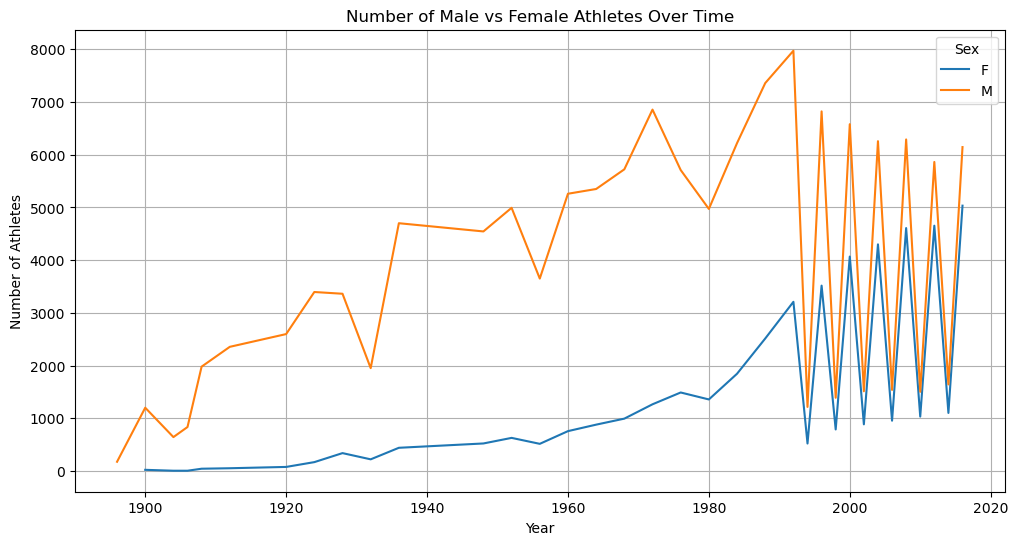

In [5]:
gender_trend = df.groupby(['Year', 'Sex'])['ID'].nunique().unstack()
gender_trend.plot(figsize=(12,6), title='Number of Male vs Female Athletes Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.grid(True)


Text(0.5, 0, 'Gold Medal to Athlete Ratio')

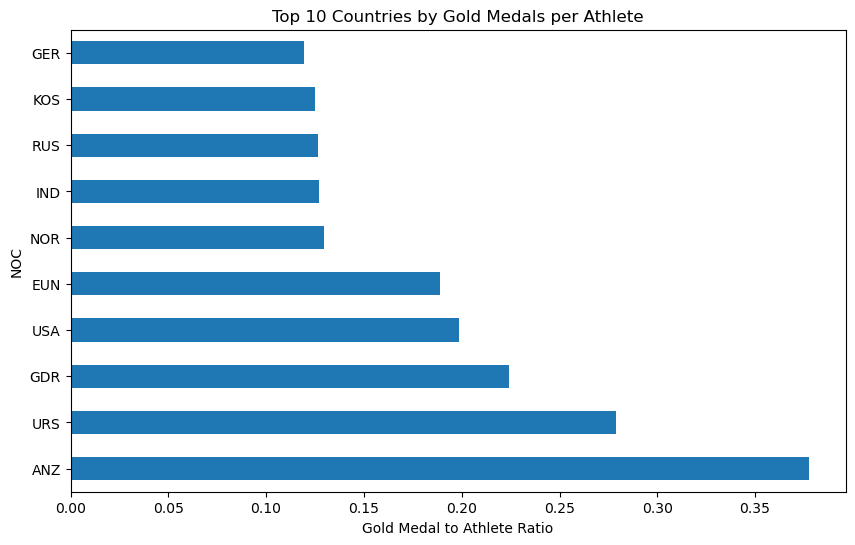

In [6]:
gold_df = df[df['Medal'] == 'Gold'].drop_duplicates(subset=['Name', 'NOC'])
athlete_counts = df.drop_duplicates(subset=['Name', 'NOC']).groupby('NOC')['Name'].count()
gold_counts = gold_df.groupby('NOC')['Name'].count()
ratio_df = (gold_counts / athlete_counts).sort_values(ascending=False).dropna().head(10)
ratio_df.plot(kind='barh', figsize=(10,6), title='Top 10 Countries by Gold Medals per Athlete')
plt.xlabel('Gold Medal to Athlete Ratio')


Text(0.5, 1.0, 'Participation by Sport and Gender')

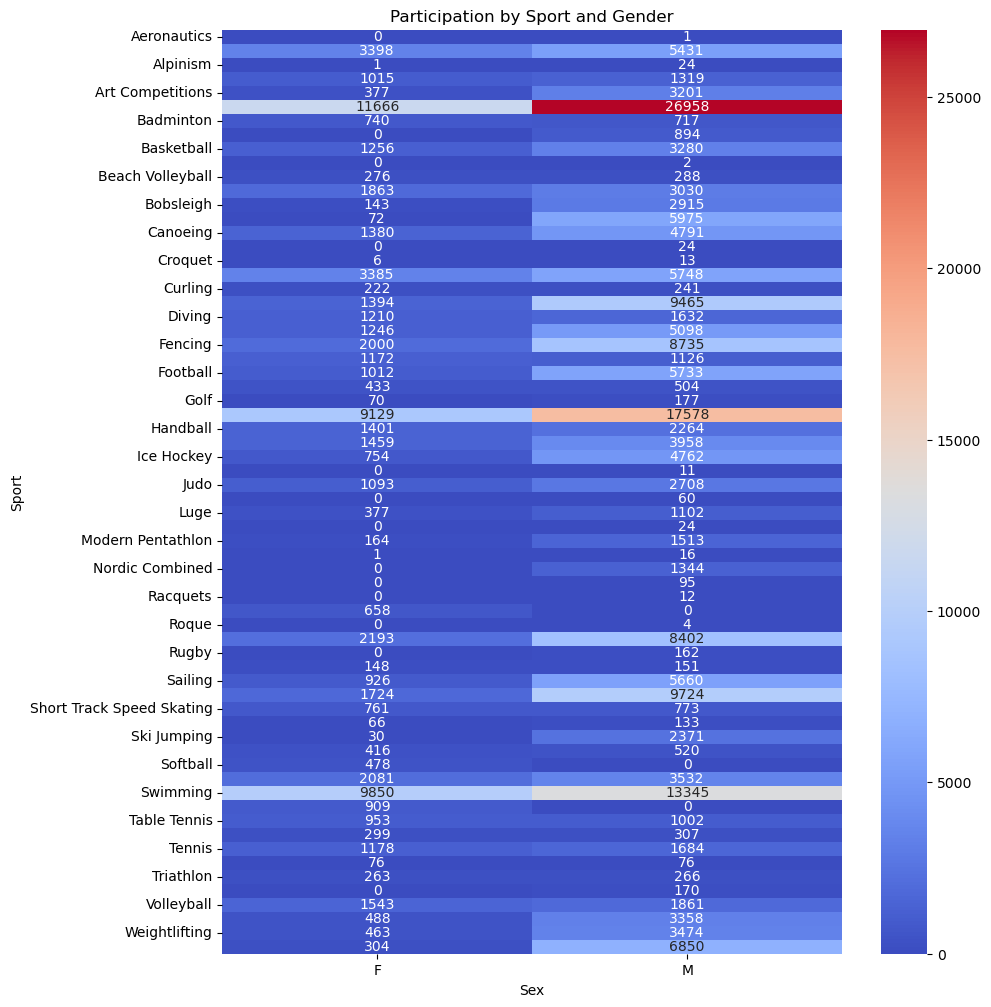

In [7]:
gender_sport = df.groupby(['Sport', 'Sex'])['ID'].count().unstack().fillna(0)
plt.figure(figsize=(10,12))
sns.heatmap(gender_sport, annot=True, fmt='.0f', cmap='coolwarm')
plt.title('Participation by Sport and Gender')


In [8]:
medals_by_country = df[df['Medal'].notnull()].groupby(['Year', 'NOC']).size().reset_index(name='Medals')
top_nocs = medals_by_country.groupby('NOC')['Medals'].sum().nlargest(6).index
filtered = medals_by_country[medals_by_country['NOC'].isin(top_nocs)]
fig = px.line(filtered, x='Year', y='Medals', color='NOC', title='Medal Trends Over Time')
fig.show()


Text(0.5, 1.0, 'Correlation Heatmap of Age, Height, and Weight')

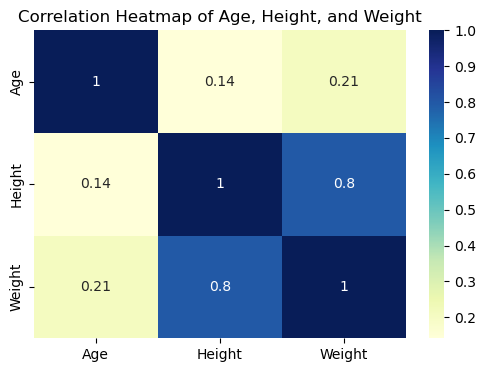

In [8]:
num_df = df[['Age', 'Height', 'Weight']].dropna()
plt.figure(figsize=(6,4))
sns.heatmap(num_df.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap of Age, Height, and Weight')



Text(0.5, 1.0, 'Average Height and Weight Across Top Sports')

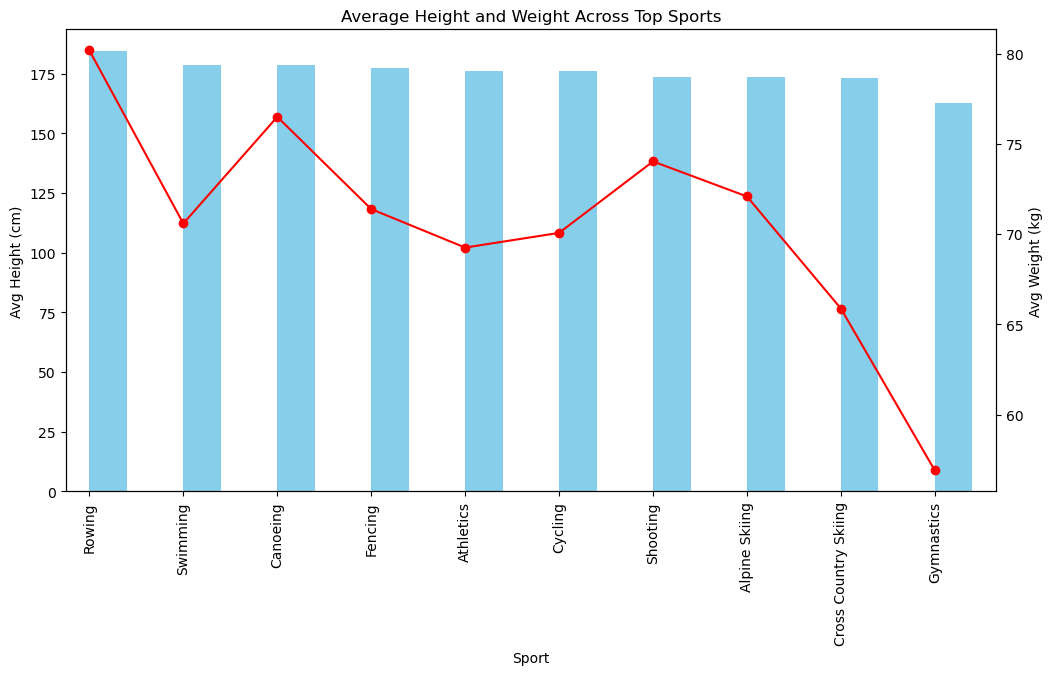

In [9]:
phys_df = df.dropna(subset=['Height', 'Weight'])
top_sports = phys_df['Sport'].value_counts().head(10).index
phys_avg = phys_df[phys_df['Sport'].isin(top_sports)].groupby('Sport')[['Height','Weight']].mean()

fig, ax1 = plt.subplots(figsize=(12,6))
ax2 = ax1.twinx()
phys_avg.sort_values('Height', ascending=False)['Height'].plot(kind='bar', color='skyblue', ax=ax1, position=0, width=0.4)
phys_avg.sort_values('Height', ascending=False)['Weight'].plot(color='red', marker='o', ax=ax2)
ax1.set_ylabel('Avg Height (cm)')
ax2.set_ylabel('Avg Weight (kg)')
plt.title('Average Height and Weight Across Top Sports')


Text(0.5, 0, 'Years Active (First to Last Olympic Year)')

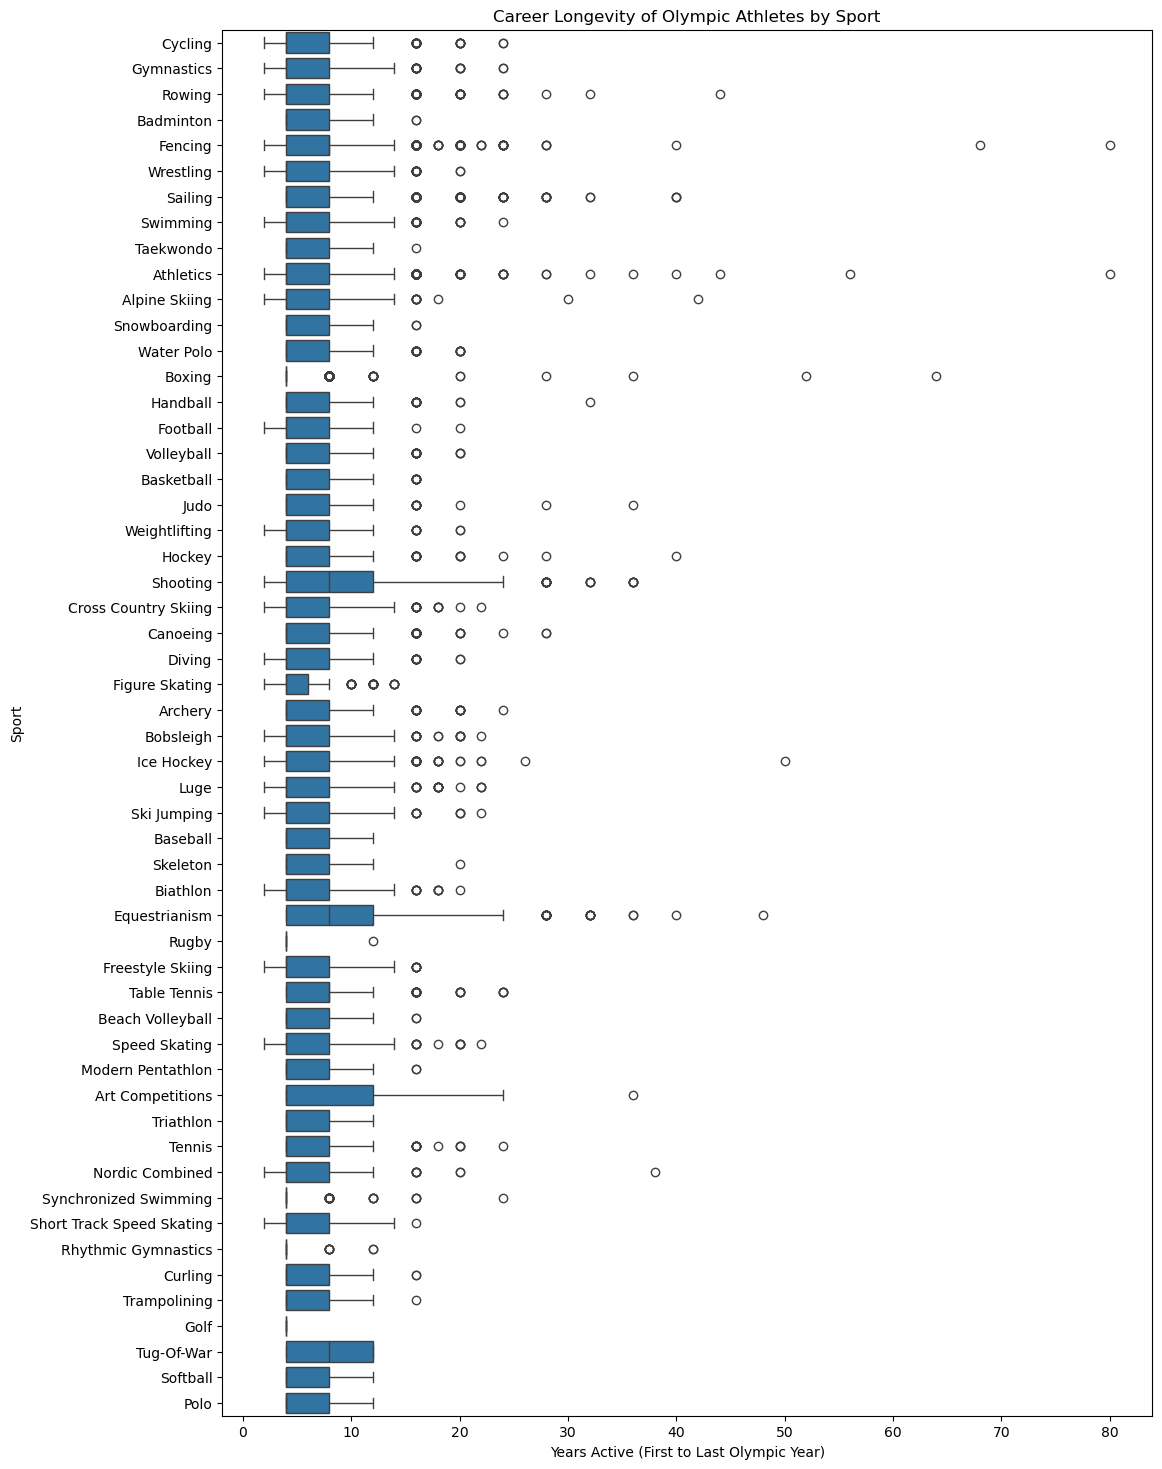

In [11]:
athlete_years = df.groupby(['Name', 'Sport'])['Year'].agg(['min', 'max'])
athlete_years['career_span'] = athlete_years['max'] - athlete_years['min']
career_spans = athlete_years[athlete_years['career_span'] > 0].reset_index()

plt.figure(figsize=(12,18))
sns.boxplot(data=career_spans, x='career_span', y='Sport')
plt.title('Career Longevity of Olympic Athletes by Sport')
plt.xlabel('Years Active (First to Last Olympic Year)')


<Axes: title={'center': 'Top Multi-Sport Athletes'}, ylabel='Name'>

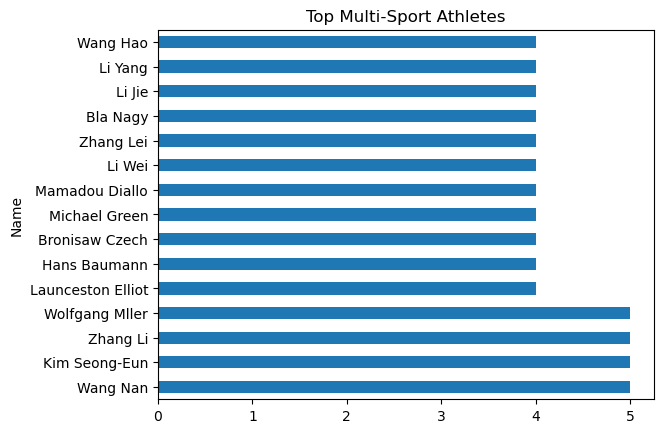

In [12]:
multi_sport = df.groupby('Name')['Sport'].nunique()
multi_sport_athletes = multi_sport[multi_sport > 1].sort_values(ascending=False).head(15)
multi_sport_athletes.plot(kind='barh', title='Top Multi-Sport Athletes')


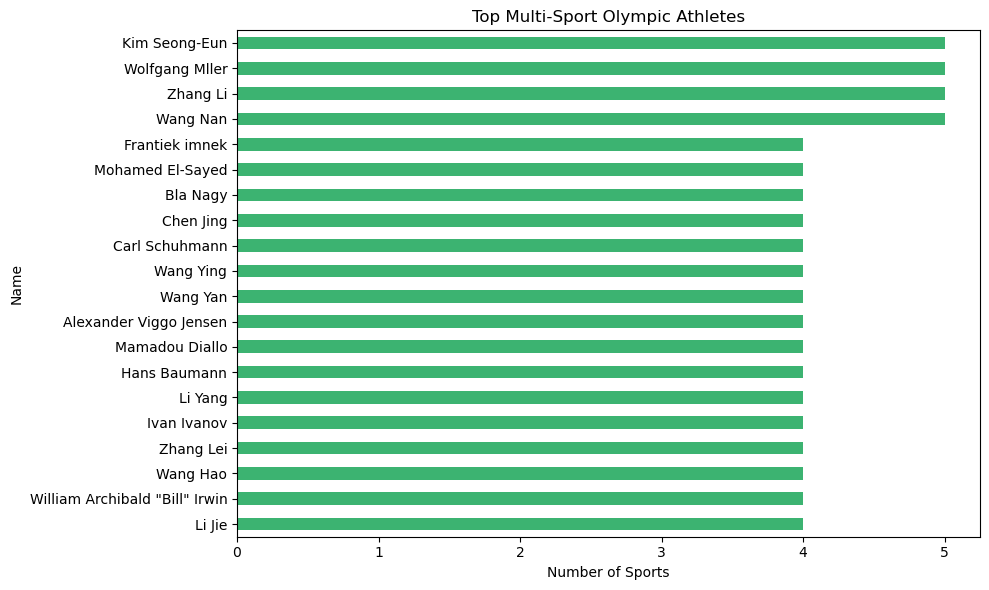

In [13]:
# Count number of unique sports per athlete
multi_sport = df.groupby('Name')['Sport'].nunique().sort_values(ascending=False)

# Filter athletes who played 2 or more sports
multi_sport_athletes = multi_sport[multi_sport > 1].head(20)

# Visualize
plt.figure(figsize=(10,6))
multi_sport_athletes.plot(kind='barh', color='mediumseagreen')
plt.title("Top Multi-Sport Olympic Athletes")
plt.xlabel("Number of Sports")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


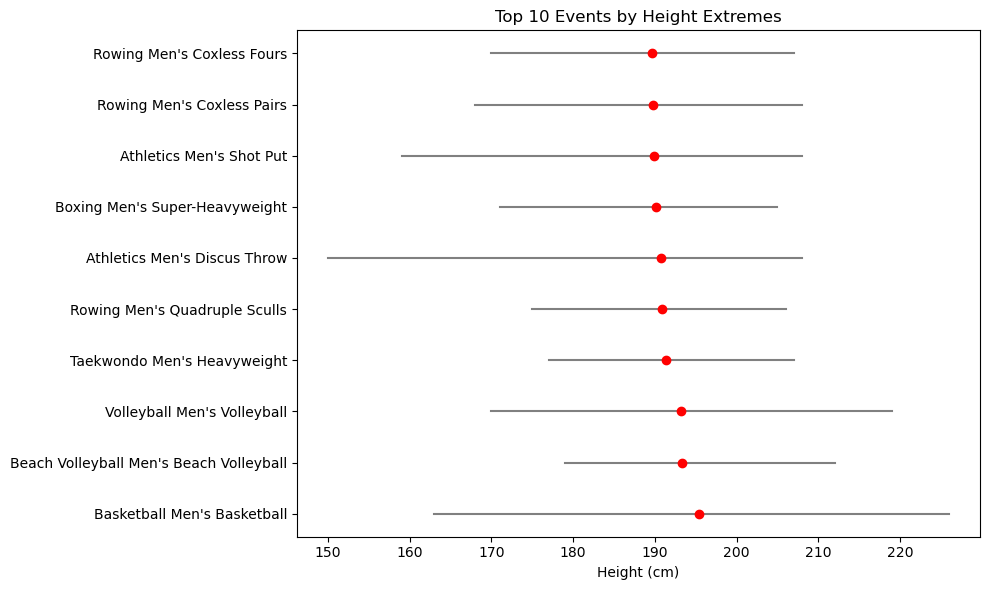

In [14]:
# Remove nulls
extreme_df = df.dropna(subset=['Height', 'Weight'])

# Average physical traits per event
event_phys = extreme_df.groupby('Event')[['Height', 'Weight']].agg(['mean', 'min', 'max'])
event_phys.columns = ['Height_mean', 'Height_min', 'Height_max', 'Weight_mean', 'Weight_min', 'Weight_max']

# Most extreme events by average height
top_extreme = event_phys.sort_values('Height_mean', ascending=False).head(10)

# Dumbbell-style plot: min to max height
plt.figure(figsize=(10,6))
for i, row in enumerate(top_extreme.itertuples()):
    plt.plot([row.Height_min, row.Height_max], [i, i], color='gray')
    plt.plot(row.Height_mean, i, 'o', color='red')
plt.yticks(range(len(top_extreme)), top_extreme.index)
plt.xlabel("Height (cm)")
plt.title("Top 10 Events by Height Extremes")
plt.tight_layout()
plt.show()


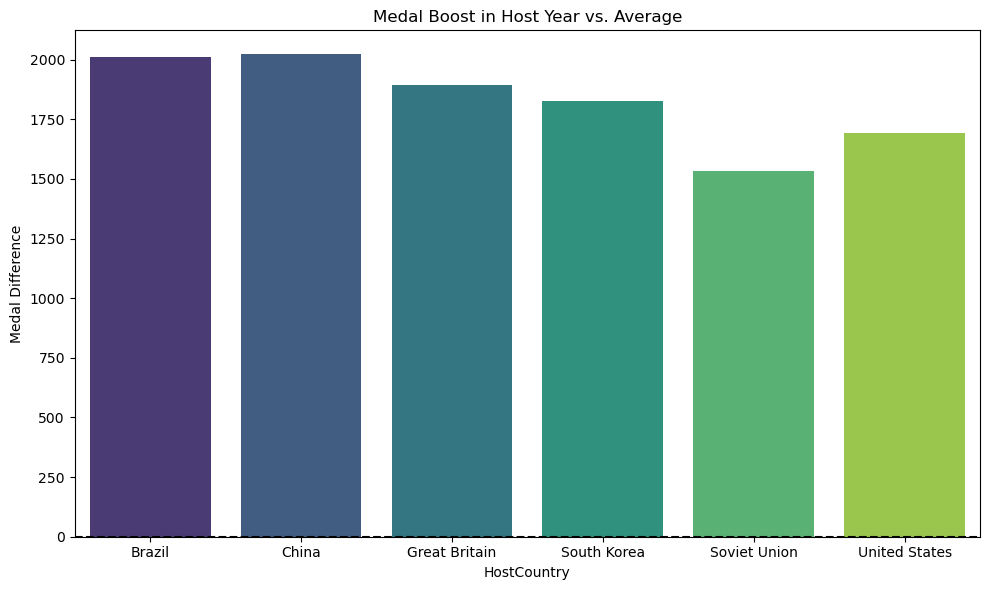

In [15]:
# Map Olympic host cities to countries (manually defined for key years)
host_countries = {
    2008: 'China', 2012: 'Great Britain', 2016: 'Brazil',
    1996: 'United States', 1988: 'South Korea', 1980: 'Soviet Union'
}

# Filter only those host years
host_df = df[df['Year'].isin(host_countries.keys()) & df['Medal'].notnull()]
host_df['HostCountry'] = host_df['Year'].map(host_countries)

# Compare host-year medals vs. average for host country
summary = host_df.groupby(['HostCountry', 'Year']).size().reset_index(name='HostYearMedals')
avg_medals = df[df['Medal'].notnull()].groupby('Team').size().div(df['Year'].nunique()).rename('AvgYearlyMedals')

merged = summary.merge(avg_medals, left_on='HostCountry', right_index=True)
merged['Boost'] = merged['HostYearMedals'] - merged['AvgYearlyMedals']

# Visualize
plt.figure(figsize=(10,6))
sns.barplot(data=merged, x='HostCountry', y='Boost', palette='viridis')
plt.axhline(0, color='black', linestyle='--')
plt.title("Medal Boost in Host Year vs. Average")
plt.ylabel("Medal Difference")
plt.tight_layout()
plt.show()


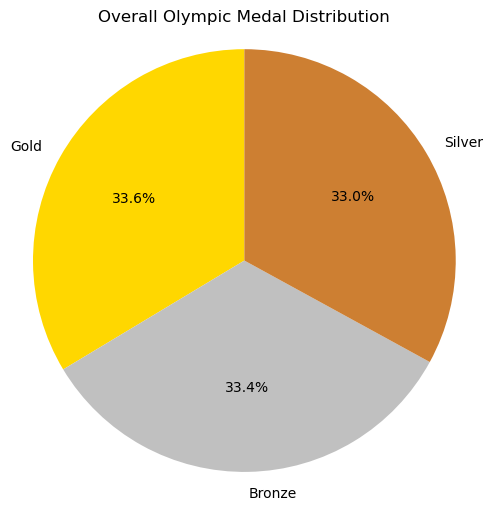

In [16]:
# Count medals
medal_counts = df['Medal'].value_counts()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(medal_counts, labels=medal_counts.index, autopct='%1.1f%%', startangle=90, colors=['gold', 'silver', '#cd7f32'])
plt.title("Overall Olympic Medal Distribution")
plt.axis('equal')
plt.show()


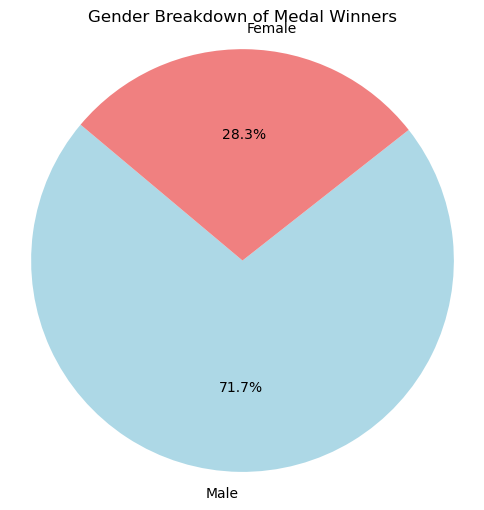

In [17]:
# Filter medalists and count by gender
gender_medals = df[df['Medal'].notnull()]['Sex'].value_counts()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(gender_medals, labels=['Male', 'Female'], autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])
plt.title("Gender Breakdown of Medal Winners")
plt.axis('equal')
plt.show()


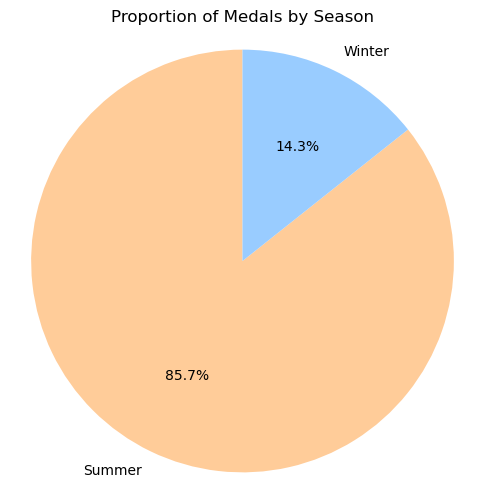

In [18]:
season_medals = df[df['Medal'].notnull()]['Season'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(season_medals, labels=season_medals.index, autopct='%1.1f%%', startangle=90, colors=['#ffcc99', '#99ccff'])
plt.title("Proportion of Medals by Season")
plt.axis('equal')
plt.show()


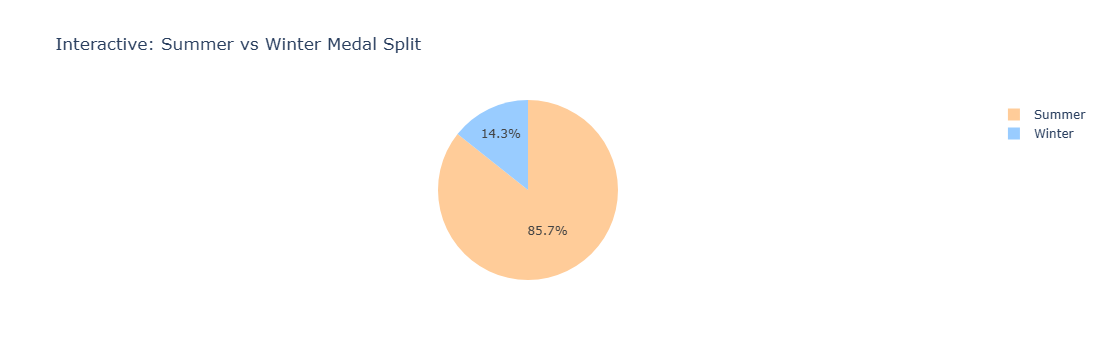

In [19]:
import plotly.express as px
fig = px.pie(values=season_medals.values, names=season_medals.index,
             title="Interactive: Summer vs Winter Medal Split",
             color_discrete_sequence=['#ffcc99', '#99ccff'])
fig.show()


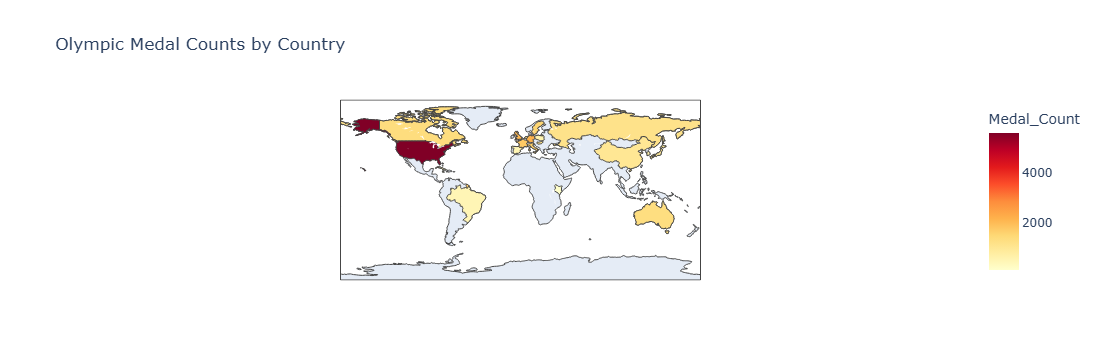

In [20]:
import plotly.express as px

# Step 1: Aggregate medal counts by NOC
medal_country = df[df['Medal'].notnull()].groupby('NOC').size().reset_index(name='Medal_Count')

# Step 2: Map NOC to ISO Alpha-3 Codes (simplified map for major countries)
noc_iso_map = {
    'USA': 'USA', 'GBR': 'GBR', 'CHN': 'CHN', 'RUS': 'RUS', 'FRA': 'FRA',
    'GER': 'DEU', 'ITA': 'ITA', 'AUS': 'AUS', 'CAN': 'CAN', 'BRA': 'BRA',
    'JPN': 'JPN', 'KOR': 'KOR', 'NED': 'NLD', 'HUN': 'HUN', 'SWE': 'SWE',
    'KEN': 'KEN', 'JAM': 'JAM', 'CUB': 'CUB', 'ESP': 'ESP', 'POL': 'POL'
    # Add more as needed...
}

# Step 3: Map ISO codes
medal_country['iso_alpha'] = medal_country['NOC'].map(noc_iso_map)
medal_country = medal_country.dropna(subset=['iso_alpha'])  # Remove unmapped

# Step 4: Plot
fig = px.choropleth(medal_country,
                    locations='iso_alpha',
                    color='Medal_Count',
                    hover_name='NOC',
                    color_continuous_scale='YlOrRd',
                    title='Olympic Medal Counts by Country')
fig.show()


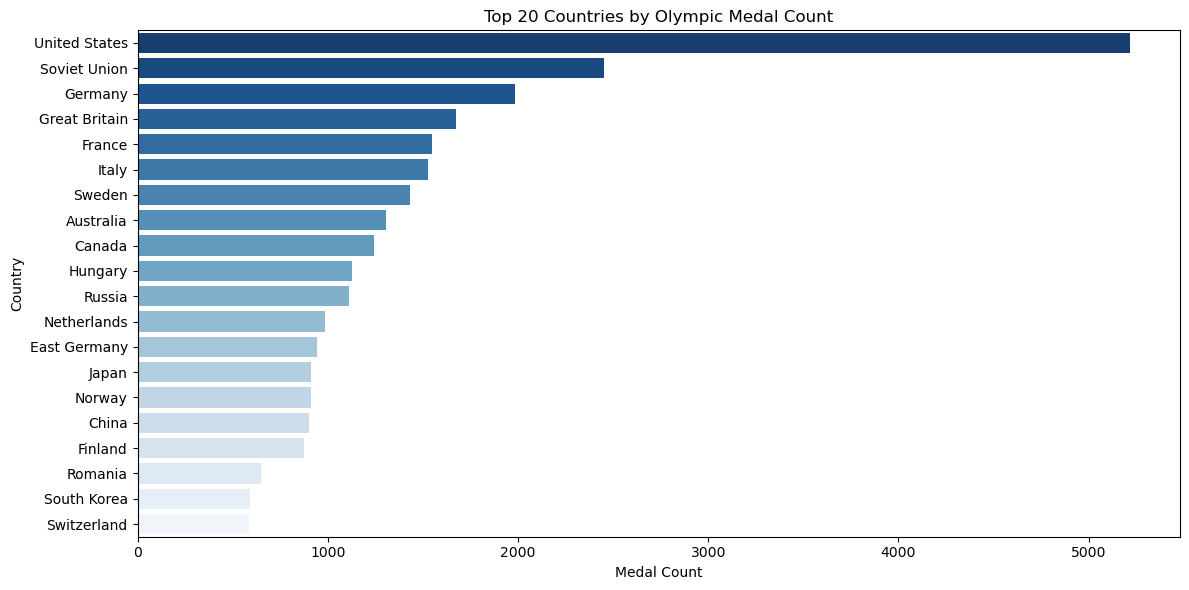

In [9]:
# Bar chart version without external mapping
medal_country = df[df['Medal'].notnull()].groupby('Team').size().reset_index(name='Medal_Count')
top_countries = medal_country.sort_values('Medal_Count', ascending=False).head(20)

plt.figure(figsize=(12,6))
sns.barplot(data=top_countries, x='Medal_Count', y='Team', palette='Blues_r')
plt.title("Top 20 Countries by Olympic Medal Count")
plt.xlabel("Medal Count")
plt.ylabel("Country")
plt.tight_layout()
plt.show()



In [ ]:
# Group by Year and Sex
gender_counts = df.groupby(['Year', 'Sex'])['ID'].nunique().unstack().fillna(0)

# Area chart
plt.figure(figsize=(12,6))
gender_counts.plot(kind='area', stacked=True, colormap='crest', figsize=(12,6))
plt.title('Olympic Athlete Participation Over Time by Gender')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
# Filter out null ages and medals
medal_age = df[df['Medal'].notnull()].dropna(subset=['Age'])

plt.figure(figsize=(12,14))
sns.kdeplot(data=medal_age, x='Age', hue='Medal', fill=True, common_norm=False, palette='muted')
plt.title("KDE Plot: Age Distribution by Medal Type")
plt.xlabel("Age")
plt.ylabel("Density")
plt.grid(True)
plt.show()


In [ ]:
# KDE by Gender
sns.kdeplot(data=df.dropna(subset=['Age']), x='Age', hue='Sex', fill=True)
plt.title("KDE Plot: Age Distribution by Gender")
plt.show()


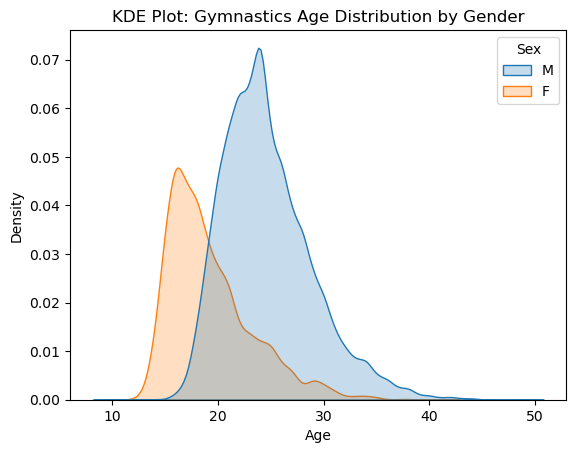

In [25]:
# KDE by a specific sport (e.g., Gymnastics)
sns.kdeplot(data=df[(df['Sport'] == 'Gymnastics') & df['Age'].notnull()], x='Age', hue='Sex', fill=True)
plt.title("KDE Plot: Gymnastics Age Distribution by Gender")
plt.show()


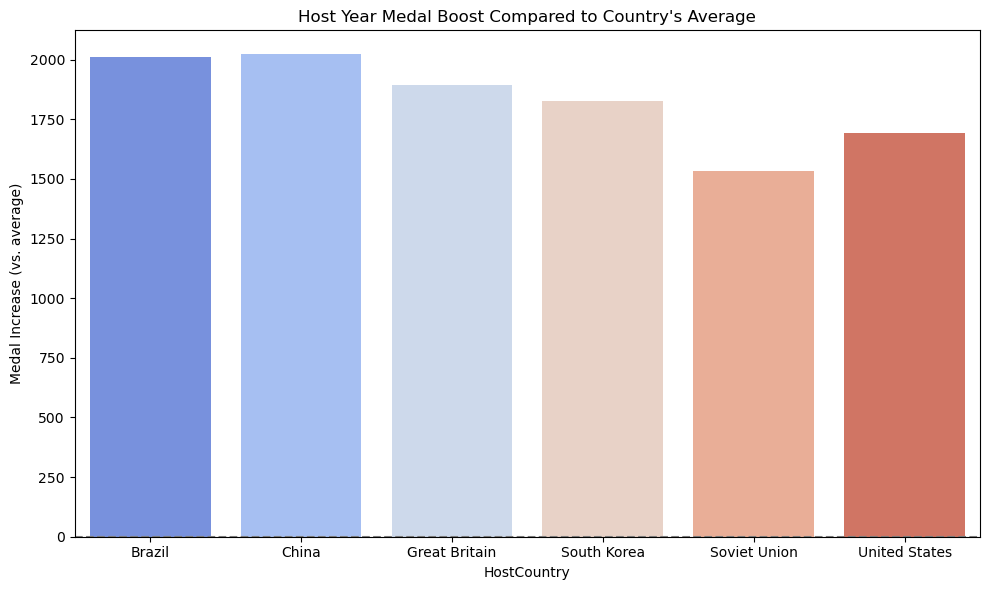

In [26]:
# Step 1: Manually define host countries and their host years
host_countries = {
    2008: 'China', 
    2012: 'Great Britain', 
    2016: 'Brazil',
    1996: 'United States', 
    1988: 'South Korea', 
    1980: 'Soviet Union'
}

# Step 2: Filter for those host year + country combos
host_df = df[df['Year'].isin(host_countries.keys()) & df['Medal'].notnull()]
host_df['HostCountry'] = host_df['Year'].map(host_countries)

# Step 3: Get host-year medal counts
host_year_medals = host_df.groupby(['HostCountry', 'Year']).size().reset_index(name='HostYearMedals')

# Step 4: Get each country's average yearly medal count across all years
avg_medals = df[df['Medal'].notnull()].groupby('Team')['Medal'].count() / df['Year'].nunique()
avg_medals = avg_medals.rename('AvgYearlyMedals')

# Step 5: Merge
host_comparison = host_year_medals.merge(avg_medals, left_on='HostCountry', right_index=True)

# Step 6: Calculate boost
host_comparison['Boost'] = host_comparison['HostYearMedals'] - host_comparison['AvgYearlyMedals']

# Step 7: Visualize
plt.figure(figsize=(10,6))
sns.barplot(data=host_comparison, x='HostCountry', y='Boost', palette='coolwarm')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Host Year Medal Boost Compared to Country's Average")
plt.ylabel("Medal Increase (vs. average)")
plt.tight_layout()
plt.show()


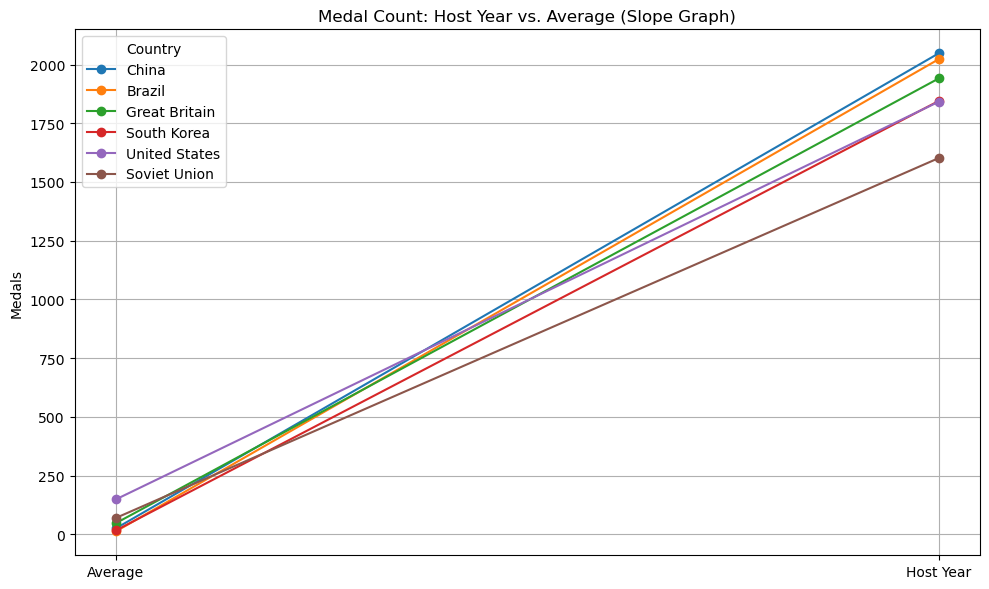

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Prepare data
host_comparison['AvgYearlyMedals'] = host_comparison['AvgYearlyMedals'].round(1)
host_comparison = host_comparison.sort_values('Boost', ascending=False)

# Plot
plt.figure(figsize=(10,6))
for i, row in host_comparison.iterrows():
    plt.plot(['Average', 'Host Year'], 
             [row['AvgYearlyMedals'], row['HostYearMedals']], 
             marker='o', label=row['HostCountry'])

plt.title('Medal Count: Host Year vs. Average (Slope Graph)')
plt.ylabel('Medals')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()


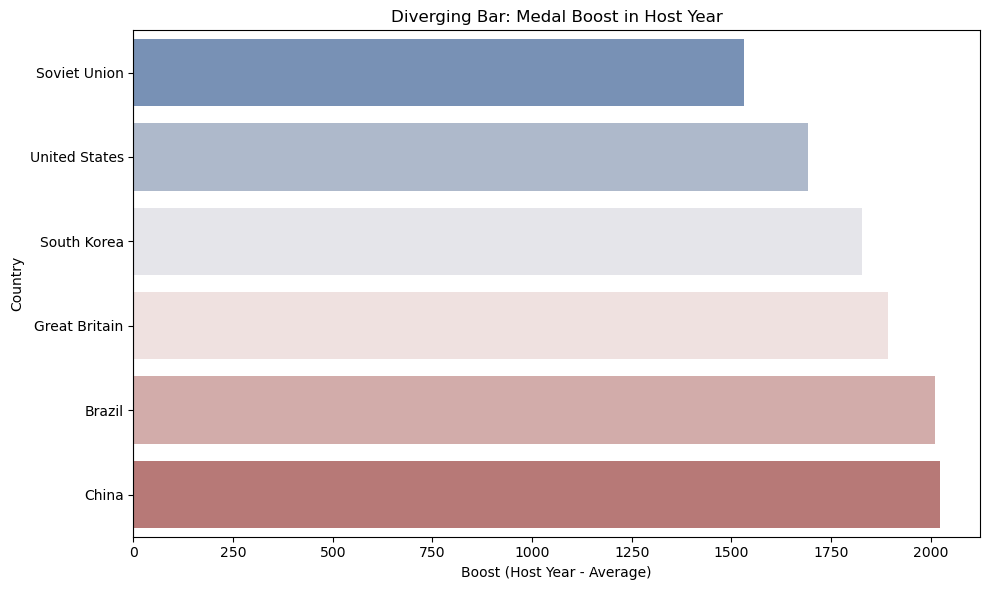

In [28]:
host_comparison_sorted = host_comparison.sort_values('Boost', ascending=True)

plt.figure(figsize=(10,6))
sns.barplot(x='Boost', y='HostCountry', data=host_comparison_sorted, palette='vlag')
plt.axvline(0, color='gray')
plt.title('Diverging Bar: Medal Boost in Host Year')
plt.xlabel('Boost (Host Year - Average)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


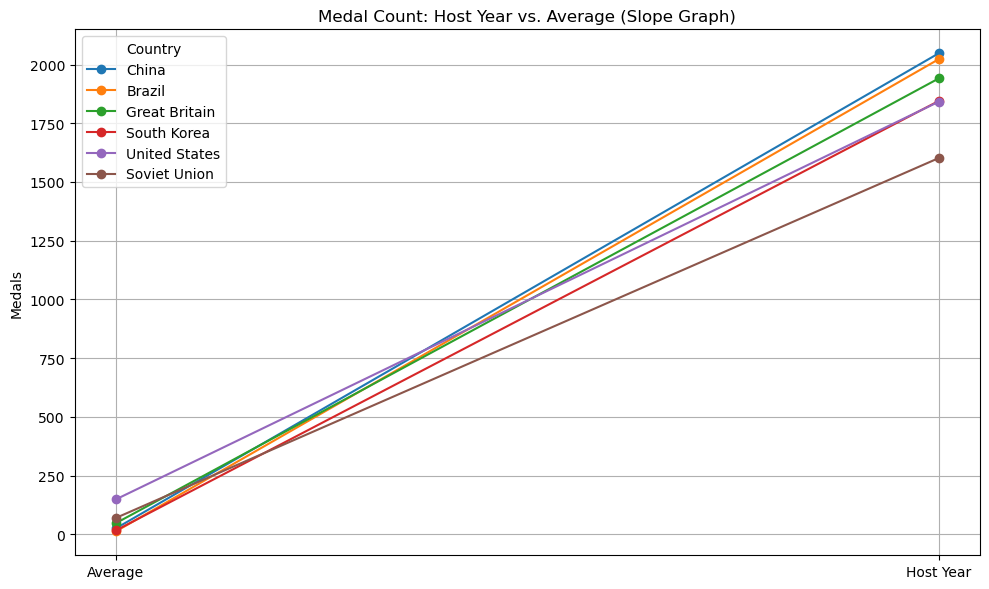

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Prepare data
host_comparison['AvgYearlyMedals'] = host_comparison['AvgYearlyMedals'].round(1)
host_comparison = host_comparison.sort_values('Boost', ascending=False)

# Plot
plt.figure(figsize=(10,6))
for i, row in host_comparison.iterrows():
    plt.plot(['Average', 'Host Year'], 
             [row['AvgYearlyMedals'], row['HostYearMedals']], 
             marker='o', label=row['HostCountry'])

plt.title('Medal Count: Host Year vs. Average (Slope Graph)')
plt.ylabel('Medals')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()


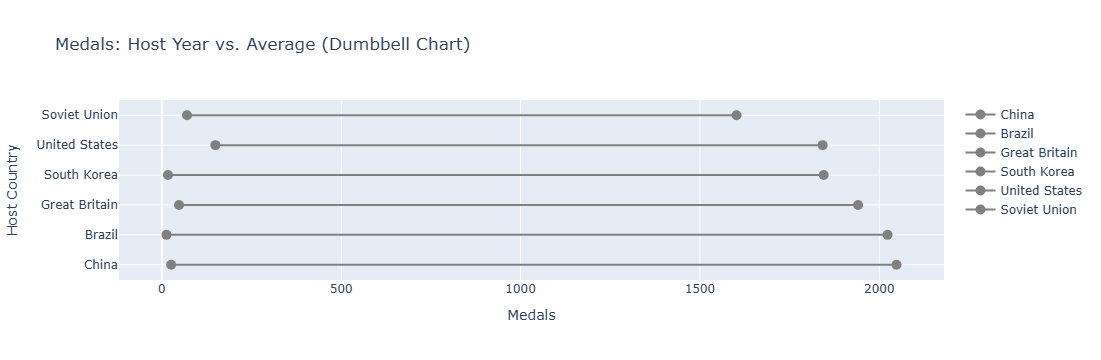

In [30]:
import plotly.graph_objects as go

fig = go.Figure()

for _, row in host_comparison.iterrows():
    fig.add_trace(go.Scatter(
        x=[row['AvgYearlyMedals'], row['HostYearMedals']],
        y=[row['HostCountry'], row['HostCountry']],
        mode='lines+markers',
        marker=dict(size=10),
        line=dict(color='gray'),
        name=row['HostCountry']
    ))

fig.update_layout(
    title='Medals: Host Year vs. Average (Dumbbell Chart)',
    xaxis_title='Medals',
    yaxis_title='Host Country',
    height=500
)
fig.show()


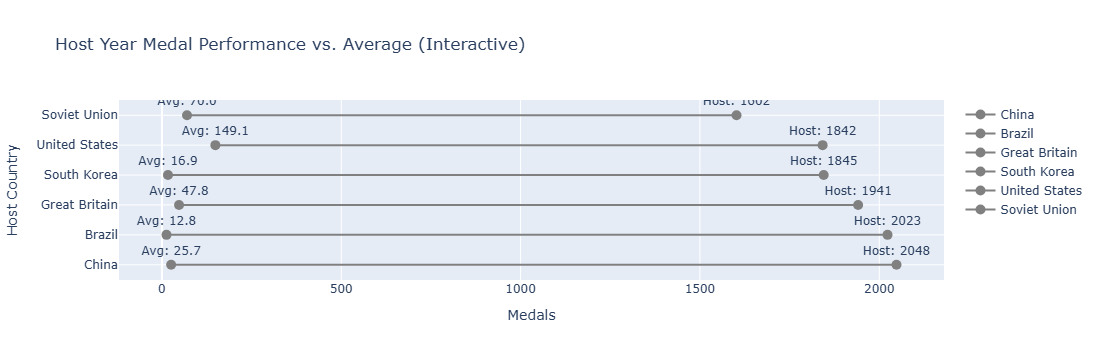

In [31]:
import plotly.graph_objects as go

fig = go.Figure()

for _, row in host_comparison.iterrows():
    fig.add_trace(go.Scatter(
        x=[row['AvgYearlyMedals'], row['HostYearMedals']],
        y=[row['HostCountry'], row['HostCountry']],
        mode='lines+markers+text',
        text=[f"Avg: {row.AvgYearlyMedals:.1f}", f"Host: {row.HostYearMedals}"],
        textposition="top center",
        line=dict(color='gray'),
        marker=dict(size=10),
        name=row['HostCountry']
    ))

fig.update_layout(
    title='Host Year Medal Performance vs. Average (Interactive)',
    xaxis_title='Medals',
    yaxis_title='Host Country',
    height=600
)
fig.show()


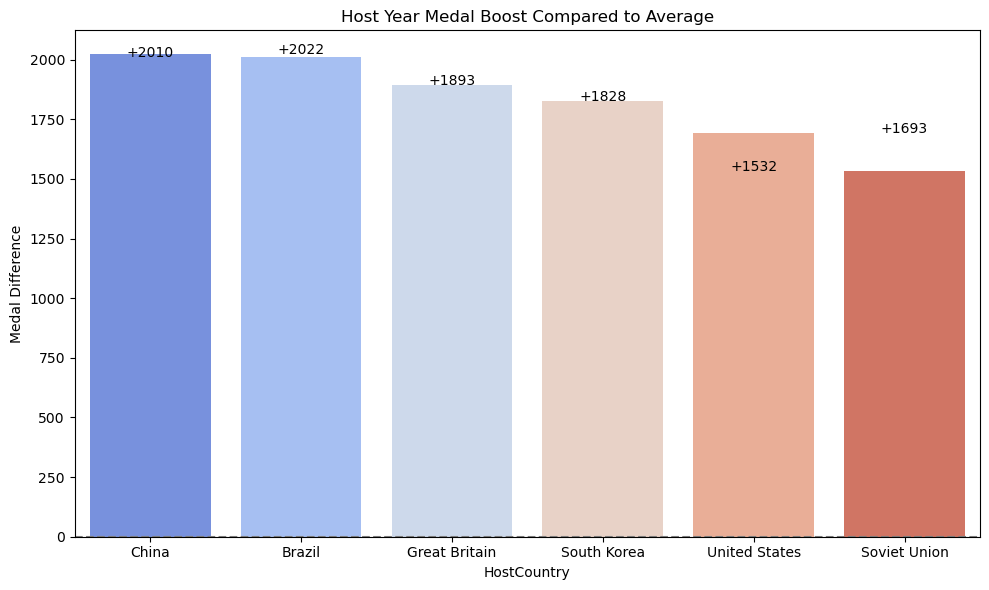

In [32]:
# Add labels to each bar
plt.figure(figsize=(10,6))
ax = sns.barplot(data=host_comparison, x='HostCountry', y='Boost', palette='coolwarm')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Host Year Medal Boost Compared to Average")
plt.ylabel("Medal Difference")

# Add value labels on top of bars
for index, row in host_comparison.iterrows():
    ax.text(index, row.Boost + 0.5, f"+{row.Boost:.0f}", ha='center')

plt.tight_layout()
plt.show()


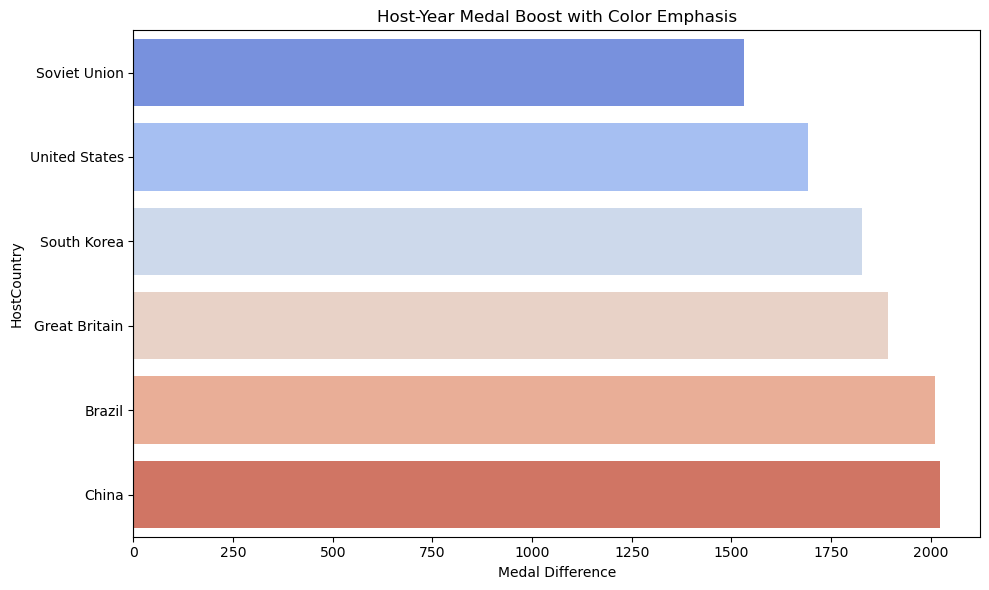

In [33]:
# Diverging Bar with color based on value
plt.figure(figsize=(10,6))
sns.barplot(x='Boost', y='HostCountry', data=host_comparison.sort_values('Boost'), 
            palette='coolwarm')
plt.axvline(0, color='gray')
plt.title('Host-Year Medal Boost with Color Emphasis')
plt.xlabel('Medal Difference')
plt.tight_layout()
plt.show()


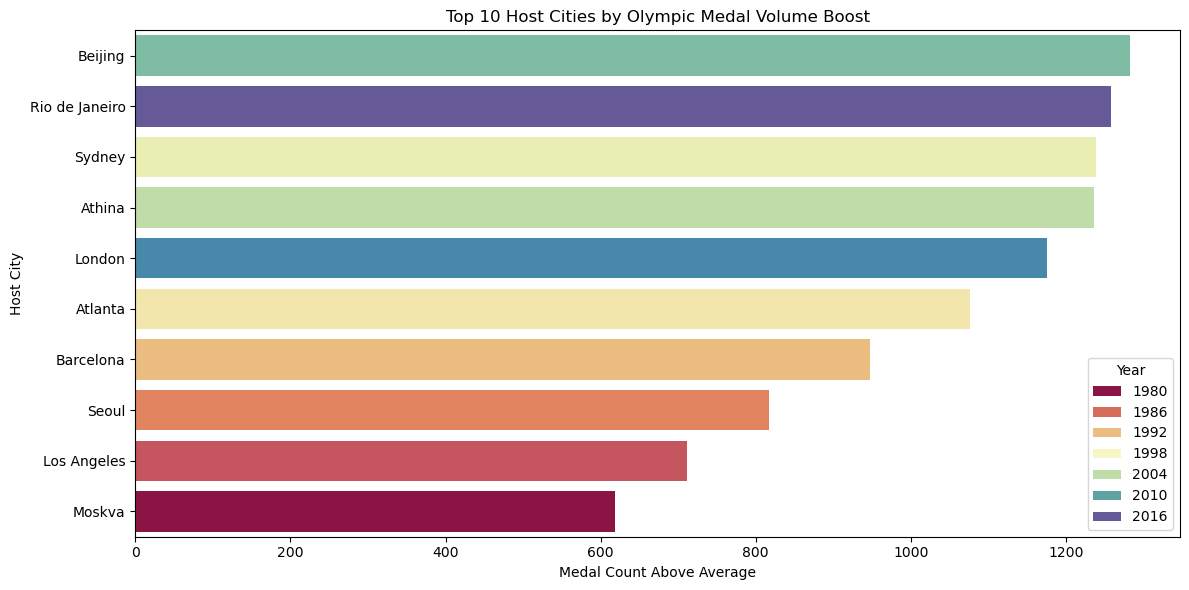

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Step 2: Filter only medal-winning records
medal_df = df[df['Medal'].notnull()]

# Step 3: Count total medals awarded in each city
city_medals = medal_df.groupby(['Year', 'City']).size().reset_index(name='Total_Medals')

# Step 4: Calculate average number of medals awarded across all cities
avg_medals = city_medals['Total_Medals'].mean().round(1)

# Step 5: Add a column for 'boost' (medals above average)
city_medals['MedalBoost'] = city_medals['Total_Medals'] - avg_medals

# Step 6: Sort by boost and plot top 10 medal-heavy cities
top_cities = city_medals.sort_values('MedalBoost', ascending=False).head(10)

# Step 7: Plot
plt.figure(figsize=(12,6))
sns.barplot(data=top_cities, x='MedalBoost', y='City', hue='Year', dodge=False, palette='Spectral')
plt.axvline(0, color='gray', linestyle='--')
plt.title("Top 10 Host Cities by Olympic Medal Volume Boost")
plt.xlabel("Medal Count Above Average")
plt.ylabel("Host City")
plt.legend(title="Year")
plt.tight_layout()
plt.show()



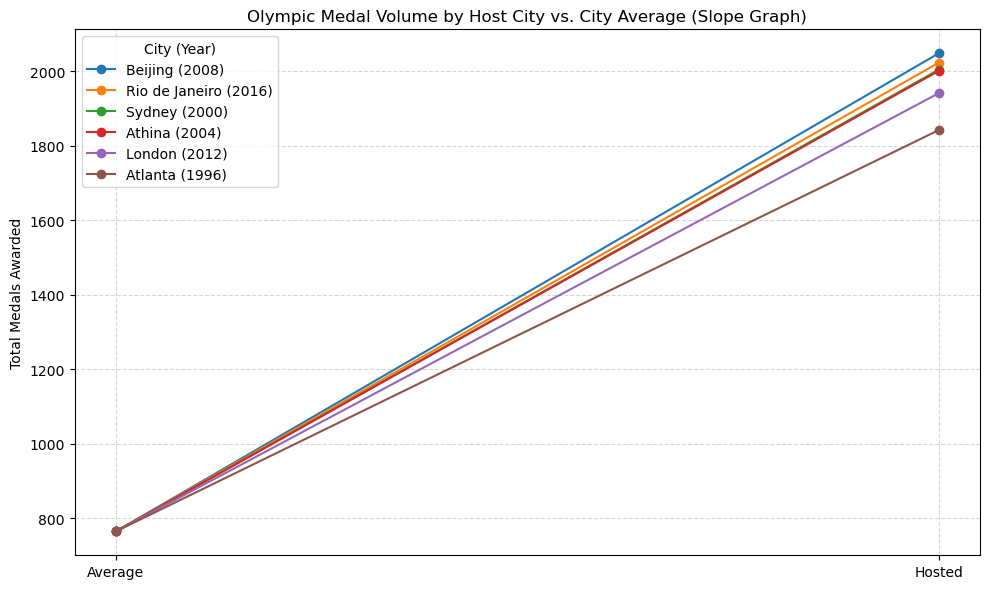

In [13]:
import pandas as pd
import matplotlib.pyplot as plt



# Step 2: Filter medal-winning entries
medal_df = df[df['Medal'].notnull()]

# Step 3: Total medals awarded per city (one row per Olympic city)
city_medals = medal_df.groupby(['Year', 'City']).size().reset_index(name='Total_Medals')

# Step 4: Compute average medals per city
avg_medals = city_medals['Total_Medals'].mean().round(1)

# Step 5: Add comparison column
city_medals['Avg_Medals'] = avg_medals
city_medals['Boost'] = city_medals['Total_Medals'] - city_medals['Avg_Medals']

# Step 6: Select top 6 medal-heavy cities for slope visualization
top_cities = city_medals.sort_values('Boost', ascending=False).head(6)

# Step 7: Plot slope chart
plt.figure(figsize=(10,6))
for i, row in top_cities.iterrows():
    plt.plot(['Average', 'Hosted'], 
             [row['Avg_Medals'], row['Total_Medals']], 
             marker='o', label=f"{row['City']} ({row['Year']})")

plt.title("Olympic Medal Volume by Host City vs. City Average (Slope Graph)")
plt.ylabel("Total Medals Awarded")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="City (Year)")
plt.tight_layout()
plt.show()



Average Age by Medal Type:
Bronze: 25.9 years
Gold: 25.9 years
Silver: 26.0 years


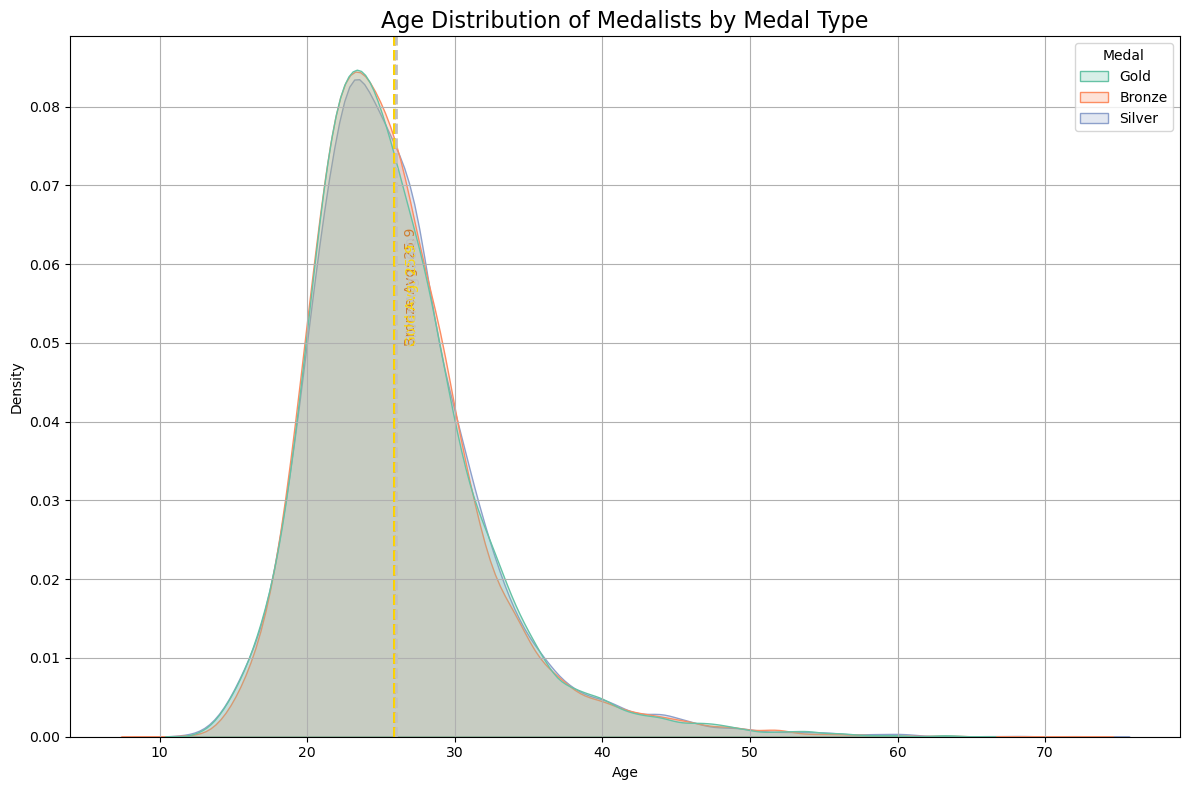

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter valid rows: Medal must exist, Age must not be null
medal_age = df[df['Medal'].notnull()].dropna(subset=['Age'])

# Step 1: Calculate average age per medal type
mean_ages = medal_age.groupby('Medal')['Age'].mean().sort_index()

# Optional: Print average ages for quick reference
print("Average Age by Medal Type:")
for medal, age in mean_ages.items():
    print(f"{medal}: {age:.1f} years")

# Step 2: Plot KDE
plt.figure(figsize=(12, 8))
sns.kdeplot(data=medal_age, x='Age', hue='Medal', fill=True, common_norm=False, palette='Set2')

# Step 3: Add vertical lines for average ages
colors = {'Gold': '#FFD700', 'Silver': '#C0C0C0', 'Bronze': '#CD7F32'}
for medal, age in mean_ages.items():
    plt.axvline(age, color=colors.get(medal, 'gray'), linestyle='--', linewidth=2)
    plt.text(age + 0.7, 0.05, f"{medal} Avg: {age:.1f}", color=colors.get(medal), rotation=90)

# Step 4: Labels and layout
plt.title("Age Distribution of Medalists by Medal Type", fontsize=16)
plt.xlabel("Age")
plt.ylabel("Density")
plt.grid(True)
plt.tight_layout()
plt.show()


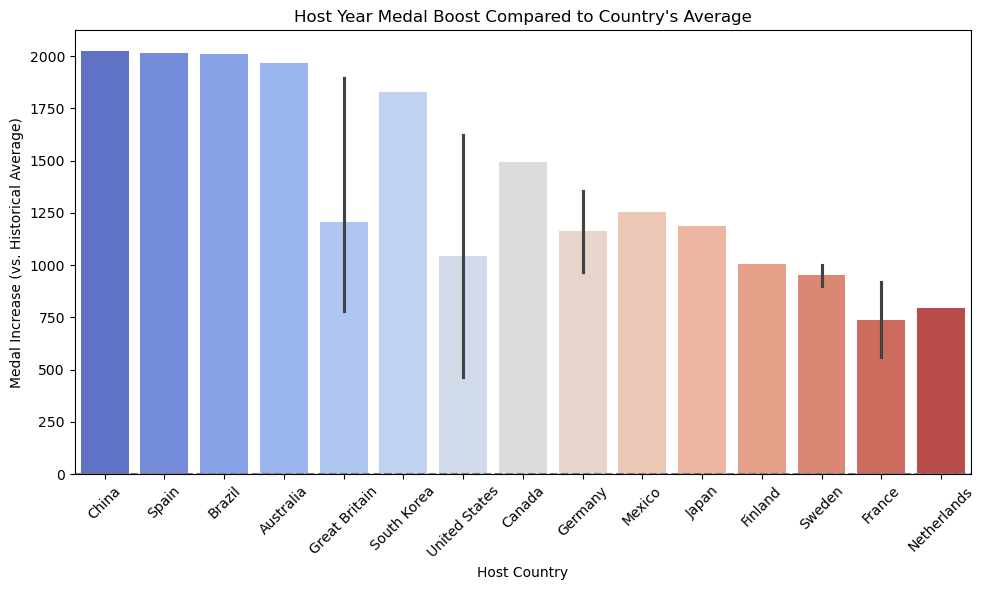

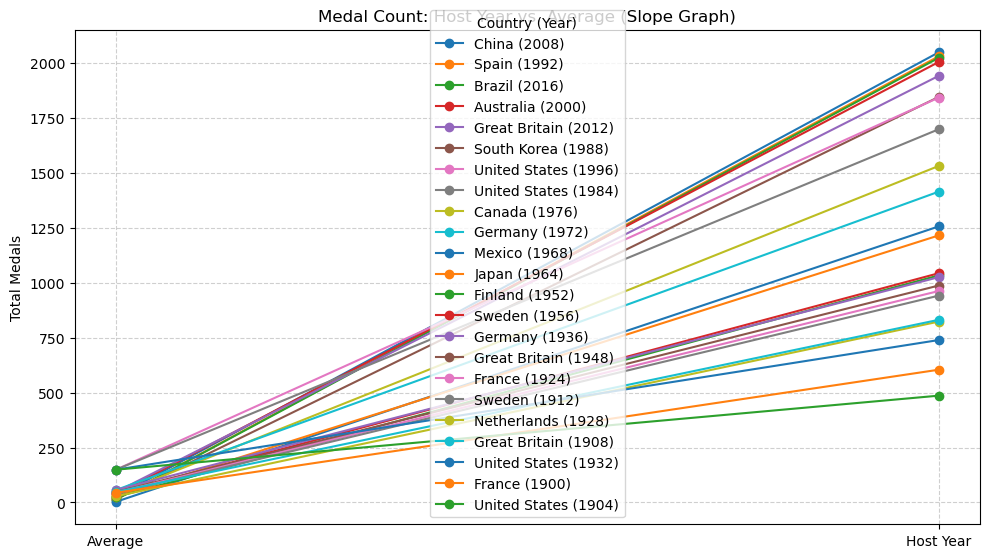

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 1: Load the dataset
df = pd.read_csv("athlete_data.csv")

# STEP 2: Filter for medal winners only
medal_df = df[df['Medal'].notnull()]

# STEP 3: Define host cities and the countries that hosted them
city_to_country = {
    'Athens': 'Greece',
    'Paris': 'France',
    'St. Louis': 'United States',
    'London': 'Great Britain',
    'Stockholm': 'Sweden',
    'Antwerp': 'Belgium',
    'Amsterdam': 'Netherlands',
    'Los Angeles': 'United States',
    'Berlin': 'Germany',
    'Helsinki': 'Finland',
    'Melbourne': 'Australia',
    'Rome': 'Italy',
    'Tokyo': 'Japan',
    'Mexico City': 'Mexico',
    'Munich': 'Germany',
    'Montreal': 'Canada',
    'Moscow': 'Soviet Union',
    'Seoul': 'South Korea',
    'Barcelona': 'Spain',
    'Atlanta': 'United States',
    'Sydney': 'Australia',
    'Beijing': 'China',
    'Rio de Janeiro': 'Brazil'
}

# STEP 4: Build Year → Country mapping from dataset itself
host_editions = df[['Year', 'City']].drop_duplicates()
host_countries = {
    row['Year']: city_to_country[row['City']]
    for _, row in host_editions.iterrows()
    if row['City'] in city_to_country
}

# STEP 5: Filter for host years and map the host country
host_df = medal_df[medal_df['Year'].isin(host_countries.keys())].copy()
host_df['HostCountry'] = host_df['Year'].map(host_countries)

# STEP 6: Get medal count for each host country during its host year
host_year_medals = host_df.groupby(['HostCountry', 'Year']).size().reset_index(name='HostYearMedals')

# STEP 7: Calculate each country's average yearly medal count (across all years)
avg_medals = medal_df.groupby('Team').size() / df['Year'].nunique()
avg_medals = avg_medals.rename('AvgYearlyMedals')

# STEP 8: Merge host year medal data with country averages
comparison_df = host_year_medals.merge(avg_medals, left_on='HostCountry', right_index=True)

# STEP 9: Calculate the medal boost
comparison_df['Boost'] = comparison_df['HostYearMedals'] - comparison_df['AvgYearlyMedals']
comparison_df = comparison_df.sort_values('Boost', ascending=False).round(1)

# STEP 10: Plot Bar Chart – Host Year Boost vs. Average
plt.figure(figsize=(10, 6))
sns.barplot(data=comparison_df, x='HostCountry', y='Boost', palette='coolwarm')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Host Year Medal Boost Compared to Country's Average")
plt.ylabel("Medal Increase (vs. Historical Average)")
plt.xlabel("Host Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# STEP 11: Plot Slope Graph – Host Year vs. Average Medals
plt.figure(figsize=(10, 6))
for _, row in comparison_df.iterrows():
    plt.plot(['Average', 'Host Year'],
             [row['AvgYearlyMedals'], row['HostYearMedals']],
             marker='o', label=f"{row['HostCountry']} ({int(row['Year'])})")

plt.title("Medal Count: Host Year vs. Average (Slope Graph)")
plt.ylabel("Total Medals")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Country (Year)")
plt.tight_layout()
plt.show()



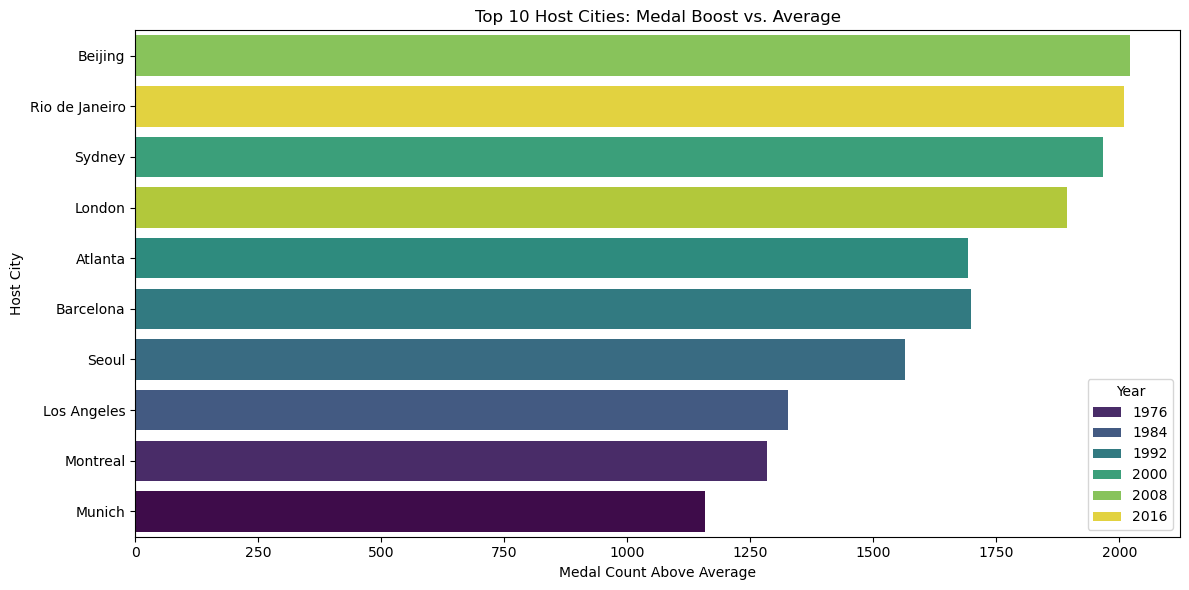

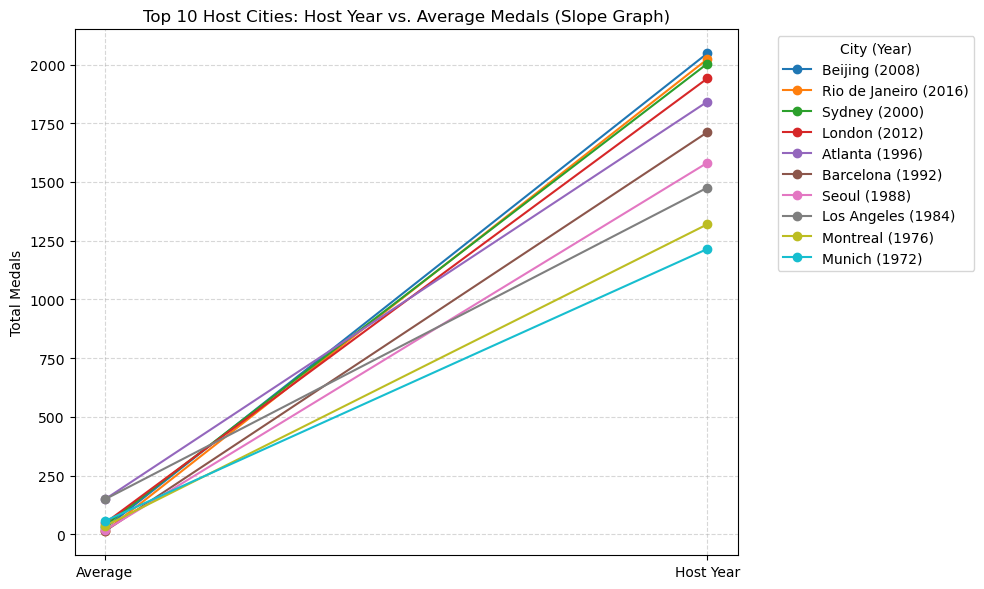

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Filter medal winners only
medal_df = df[df['Medal'].notnull()]

# Manually define mapping: City → Country
city_to_country = {
    'Athens': 'Greece',
    'Paris': 'France',
    'St. Louis': 'United States',
    'London': 'Great Britain',
    'Stockholm': 'Sweden',
    'Antwerp': 'Belgium',
    'Amsterdam': 'Netherlands',
    'Los Angeles': 'United States',
    'Berlin': 'Germany',
    'Helsinki': 'Finland',
    'Melbourne': 'Australia',
    'Rome': 'Italy',
    'Tokyo': 'Japan',
    'Mexico City': 'Mexico',
    'Munich': 'Germany',
    'Montreal': 'Canada',
    'Moscow': 'Soviet Union',
    'Seoul': 'South Korea',
    'Barcelona': 'Spain',
    'Atlanta': 'United States',
    'Sydney': 'Australia',
    'Beijing': 'China',
    'Rio de Janeiro': 'Brazil'
}

# Build host year → country mapping
host_editions = df[['Year', 'City']].drop_duplicates()
host_countries = {
    row['Year']: city_to_country[row['City']]
    for _, row in host_editions.iterrows()
    if row['City'] in city_to_country
}

# Filter to host years
host_df = medal_df[medal_df['Year'].isin(host_countries)].copy()
host_df['HostCountry'] = host_df['Year'].map(host_countries)
host_df['HostCity'] = host_df['City']

# Total medals for each host city/year
host_year_medals = host_df.groupby(['HostCountry', 'HostCity', 'Year']).size().reset_index(name='HostYearMedals')

# Average medal count per country across all years
avg_medals = medal_df.groupby('Team').size() / df['Year'].nunique()
avg_medals = avg_medals.rename('AvgYearlyMedals')

# Merge
comparison = host_year_medals.merge(avg_medals, left_on='HostCountry', right_index=True)

# Compute boost and keep top 10 cities by medal count
comparison['Boost'] = comparison['HostYearMedals'] - comparison['AvgYearlyMedals']
comparison = comparison.sort_values('HostYearMedals', ascending=False).head(10).round(1)

# ---------- Visualization ---------- #

# Bar chart: Top 10 host cities by medal boost
plt.figure(figsize=(12, 6))
sns.barplot(data=comparison, x='Boost', y='HostCity', hue='Year', dodge=False, palette='viridis')
plt.axvline(0, color='gray', linestyle='--')
plt.title("Top 10 Host Cities: Medal Boost vs. Average")
plt.xlabel("Medal Count Above Average")
plt.ylabel("Host City")
plt.tight_layout()
plt.show()

# Slope graph: Medal change from average to host year
plt.figure(figsize=(10, 6))
for _, row in comparison.iterrows():
    plt.plot(['Average', 'Host Year'],
             [row['AvgYearlyMedals'], row['HostYearMedals']],
             marker='o',
             label=f"{row['HostCity']} ({int(row['Year'])})")

plt.title("Top 10 Host Cities: Host Year vs. Average Medals (Slope Graph)")
plt.ylabel("Total Medals")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="City (Year)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


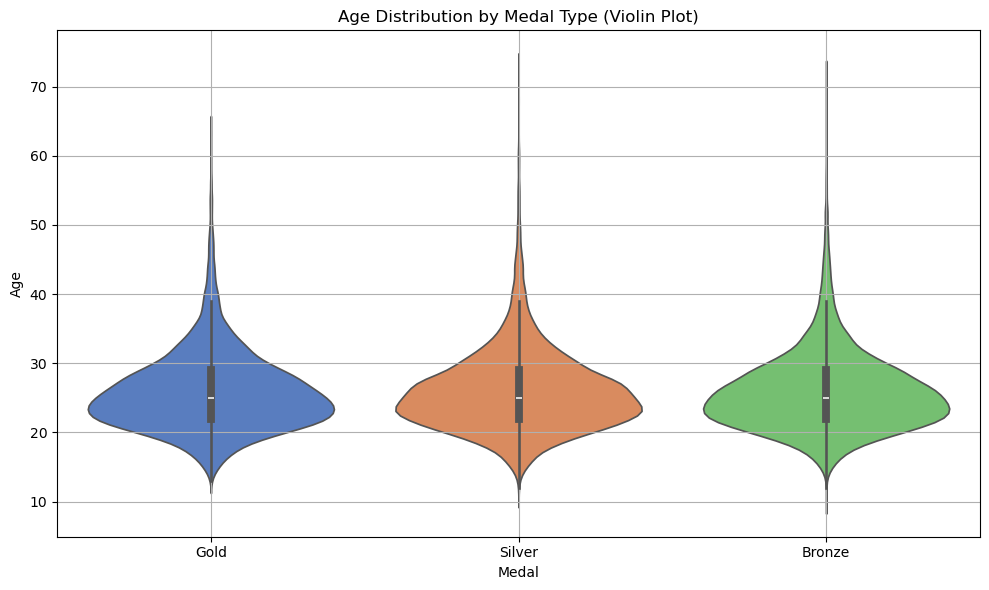

In [44]:
plt.figure(figsize=(10,6))
sns.violinplot(data=medal_age, x='Medal', y='Age', palette='muted', order=['Gold', 'Silver', 'Bronze'])
plt.title("Age Distribution by Medal Type (Violin Plot)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(12,6))
sns.swarmplot(data=medal_age, x='Medal', y='Age', palette='coolwarm', order=['Gold', 'Silver', 'Bronze'], size=3)
plt.title("Individual Athlete Ages by Medal Type (Swarm Plot)")
plt.tight_layout()
plt.grid(True)
plt.show()


In [ ]:
g = sns.FacetGrid(medal_age, col='Medal', col_order=['Gold', 'Silver', 'Bronze'], height=4, aspect=1)
g.map(sns.kdeplot, 'Age', fill=True, common_norm=False, color='skyblue')
g.fig.suptitle("KDE of Age by Medal Type (Faceted)", y=1.05)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setup
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')

# Medal order and color map
medal_order = ['Gold', 'Silver', 'Bronze']
medal_colors = ['#FFD700', '#C0C0C0', '#CD7F32']

# Draw boxplot
box = sns.boxplot(
    data=medal_age,
    x='Medal',
    y='Age',
    order=medal_order,
    palette=medal_colors,
    width=0.5,
    linewidth=2,
    fliersize=3  # smaller outlier dots
)

# Title & Labels
plt.title("Age Distribution of Olympic Medalists by Medal Type", fontsize=15, fontweight='bold')
plt.xlabel("Medal Type", fontsize=12)
plt.ylabel("Athlete Age", fontsize=12)

# Annotate median values on top of each box
medians = medal_age.groupby('Medal')['Age'].median()
for i, medal in enumerate(medal_order):
    median_val = medians[medal]
    plt.text(i, median_val + 0.5, f"Median: {median_val:.1f}", 
             horizontalalignment='center', fontweight='bold', color='black')

# Grid and layout
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
g = sns.FacetGrid(medal_age, col='Medal', col_order=['Gold', 'Silver', 'Bronze'], height=4, aspect=1)
g.map(sns.kdeplot, 'Age', fill=True, common_norm=False, color='skyblue')
g.fig.suptitle("KDE of Age by Medal Type (Faceted)", y=1.05)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Filter valid rows (Medal exists and Age is not null)
medal_age = df[df['Medal'].notnull()].dropna(subset=['Age'])

# Step 2: Define order and colors for medals
medal_order = ['Gold', 'Silver', 'Bronze']
medal_colors = ['#FFD700', '#C0C0C0', '#CD7F32']  # gold, silver, bronze

# Step 3: Calculate median age per medal type (for annotations)
median_ages = medal_age.groupby('Medal')['Age'].median()

# Step 4: Set visual style and figure
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

# Step 5: Draw the box plot
ax = sns.boxplot(
    data=medal_age,
    x='Medal',
    y='Age',
    order=medal_order,
    palette=medal_colors,
    linewidth=2,
    width=0.5,
    fliersize=3  # smaller dots for outliers
)

# Step 6: Add median labels
for i, medal in enumerate(medal_order):
    median_val = median_ages[medal]
    plt.text(i, median_val + 0.5, f"Median: {median_val:.1f}", 
             horizontalalignment='center', fontsize=10, fontweight='bold', color='black')

# Step 7: Titles and labels
plt.title("Age Distribution of Olympic Medalists by Medal Type", fontsize=15, fontweight='bold')
plt.xlabel("Medal Type", fontsize=12)
plt.ylabel("Age of Athletes", fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
# Drop rows with missing age or gender
gender_age_df = df.dropna(subset=['Age', 'Sex'])

plt.figure(figsize=(12,6))
sns.kdeplot(data=gender_age_df, x='Age', hue='Sex', fill=True, common_norm=False, palette='coolwarm')
plt.title("Age Distribution by Gender (KDE Plot)")
plt.xlabel("Age")
plt.ylabel("Density")
plt.grid(True)
plt.tight_layout()
plt.show()


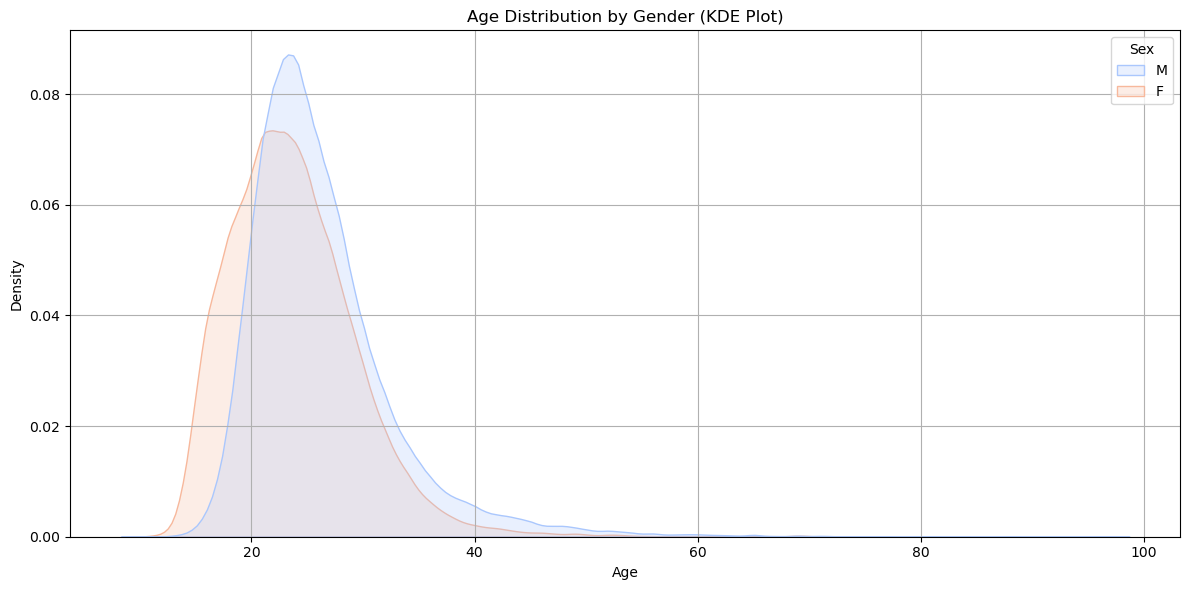

In [4]:
# Drop rows with missing age or gender
gender_age_df = df.dropna(subset=['Age', 'Sex'])

plt.figure(figsize=(12,6))
sns.kdeplot(data=gender_age_df, x='Age', hue='Sex', fill=True, common_norm=False, palette='coolwarm')
plt.title("Age Distribution by Gender (KDE Plot)")
plt.xlabel("Age")
plt.ylabel("Density")
plt.grid(True)
plt.tight_layout()
plt.show()


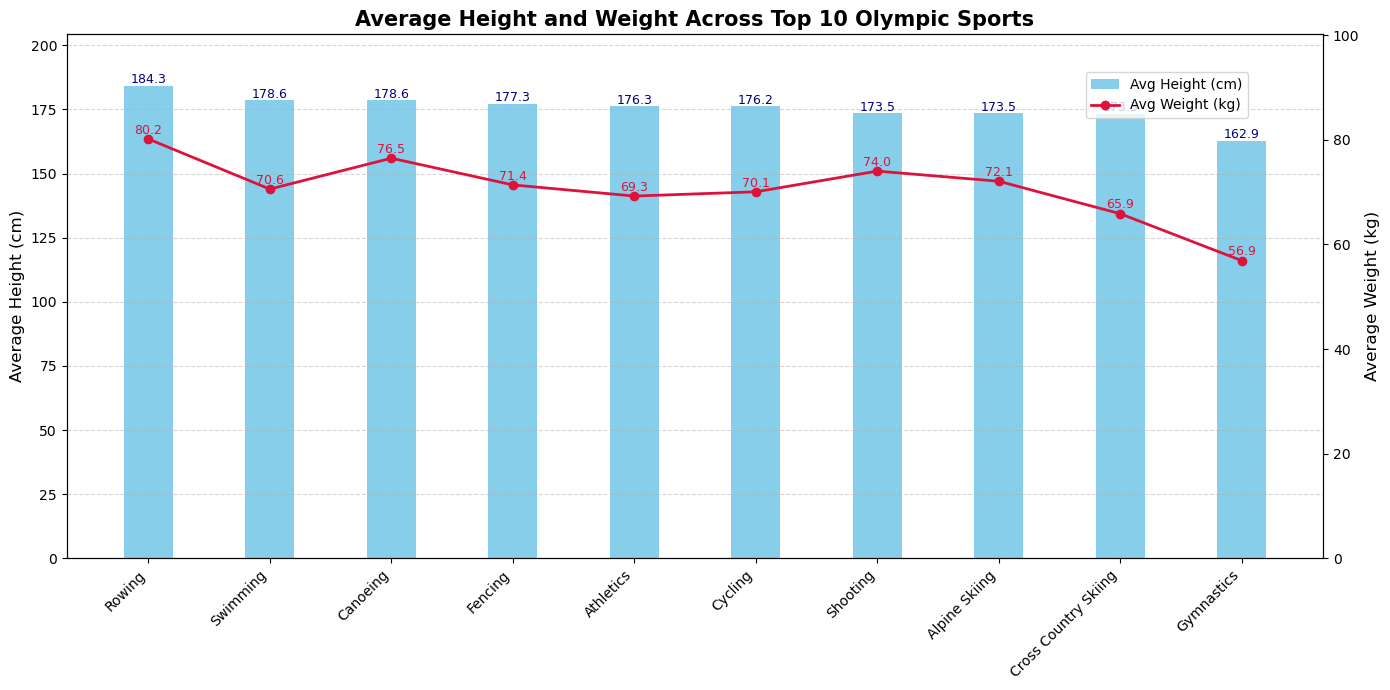

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Clean and prepare data
phys_df = df.dropna(subset=['Height', 'Weight'])
top_sports = phys_df['Sport'].value_counts().head(10).index

# Step 2: Calculate average height & weight for top sports
phys_avg = phys_df[phys_df['Sport'].isin(top_sports)].groupby('Sport')[['Height', 'Weight']].mean()
phys_avg = phys_avg.sort_values('Height', ascending=False)  # sort by height

# Step 3: Setup plot
fig, ax1 = plt.subplots(figsize=(14, 7))
ax2 = ax1.twinx()
sports = phys_avg.index

# Bar plot for Height
bar = ax1.bar(sports, phys_avg['Height'], color='skyblue', width=0.4, label='Avg Height (cm)', align='center')

# Line plot for Weight
line = ax2.plot(sports, phys_avg['Weight'], color='crimson', marker='o', linewidth=2, label='Avg Weight (kg)')

# Step 4: Customize axes
ax1.set_ylabel('Average Height (cm)', fontsize=12)
ax2.set_ylabel('Average Weight (kg)', fontsize=12)
ax1.set_xticklabels(sports, rotation=45, ha='right')
ax1.set_ylim(0, phys_avg['Height'].max() + 20)
ax2.set_ylim(0, phys_avg['Weight'].max() + 20)

# Step 5: Annotate values
for i, sport in enumerate(sports):
    ax1.text(i, phys_avg['Height'][sport] + 1, f"{phys_avg['Height'][sport]:.1f}", ha='center', fontsize=9, color='navy')
    ax2.text(i, phys_avg['Weight'][sport] + 1, f"{phys_avg['Weight'][sport]:.1f}", ha='center', fontsize=9, color='crimson')

# Step 6: Title & layout
plt.title('Average Height and Weight Across Top 10 Olympic Sports', fontsize=15, fontweight='bold')
ax1.grid(True, axis='y', linestyle='--', alpha=0.5)
fig.tight_layout()

# Add legends manually
fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.9))

plt.show()


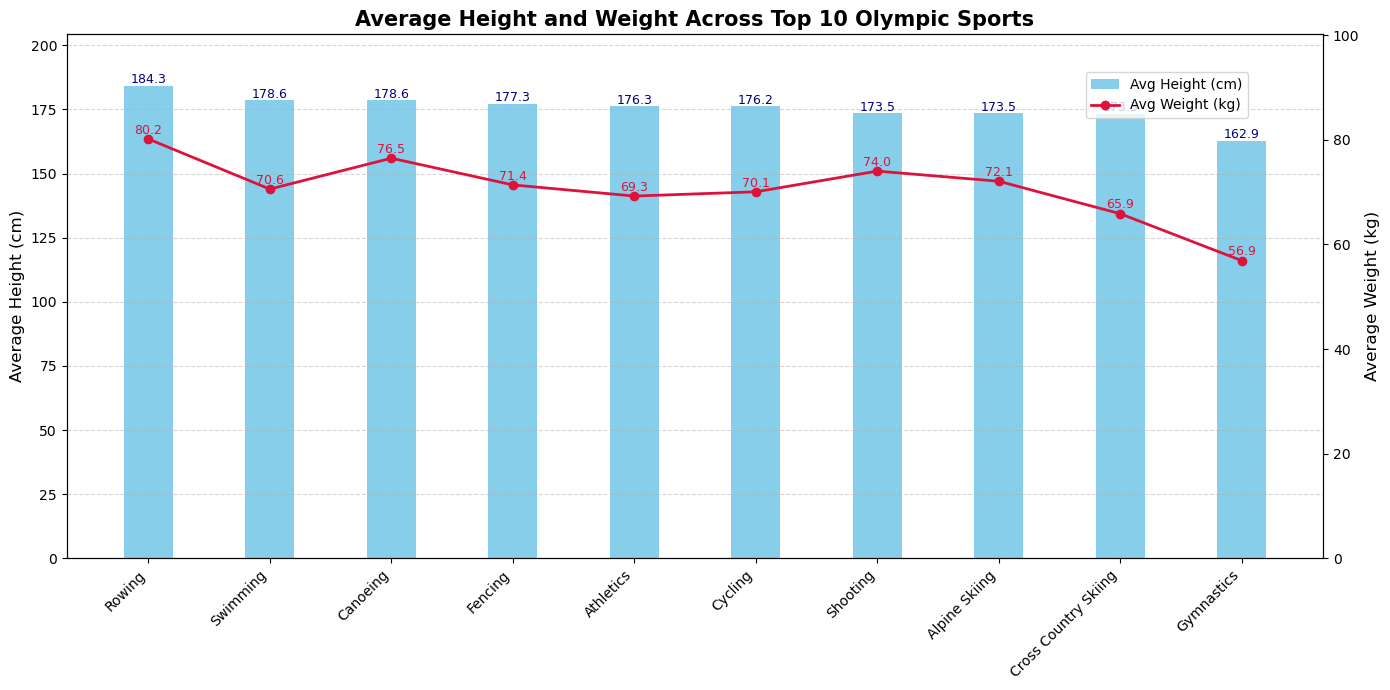

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Clean and prepare data
phys_df = df.dropna(subset=['Height', 'Weight'])
top_sports = phys_df['Sport'].value_counts().head(10).index

# Step 2: Calculate average height & weight for top sports
phys_avg = phys_df[phys_df['Sport'].isin(top_sports)].groupby('Sport')[['Height', 'Weight']].mean()
phys_avg = phys_avg.sort_values('Height', ascending=False)  # sort by height

# Step 3: Setup plot
fig, ax1 = plt.subplots(figsize=(14, 7))
ax2 = ax1.twinx()
sports = phys_avg.index

# Bar plot for Height
bar = ax1.bar(sports, phys_avg['Height'], color='skyblue', width=0.4, label='Avg Height (cm)', align='center')

# Line plot for Weight
line = ax2.plot(sports, phys_avg['Weight'], color='crimson', marker='o', linewidth=2, label='Avg Weight (kg)')

# Step 4: Customize axes
ax1.set_ylabel('Average Height (cm)', fontsize=12)
ax2.set_ylabel('Average Weight (kg)', fontsize=12)
ax1.set_xticklabels(sports, rotation=45, ha='right')
ax1.set_ylim(0, phys_avg['Height'].max() + 20)
ax2.set_ylim(0, phys_avg['Weight'].max() + 20)

# Step 5: Annotate values
for i, sport in enumerate(sports):
    ax1.text(i, phys_avg['Height'][sport] + 1, f"{phys_avg['Height'][sport]:.1f}", ha='center', fontsize=9, color='navy')
    ax2.text(i, phys_avg['Weight'][sport] + 1, f"{phys_avg['Weight'][sport]:.1f}", ha='center', fontsize=9, color='crimson')

# Step 6: Title & layout
plt.title('Average Height and Weight Across Top 10 Olympic Sports', fontsize=15, fontweight='bold')
ax1.grid(True, axis='y', linestyle='--', alpha=0.5)
fig.tight_layout()

# Add legends manually
fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.9))

plt.show()


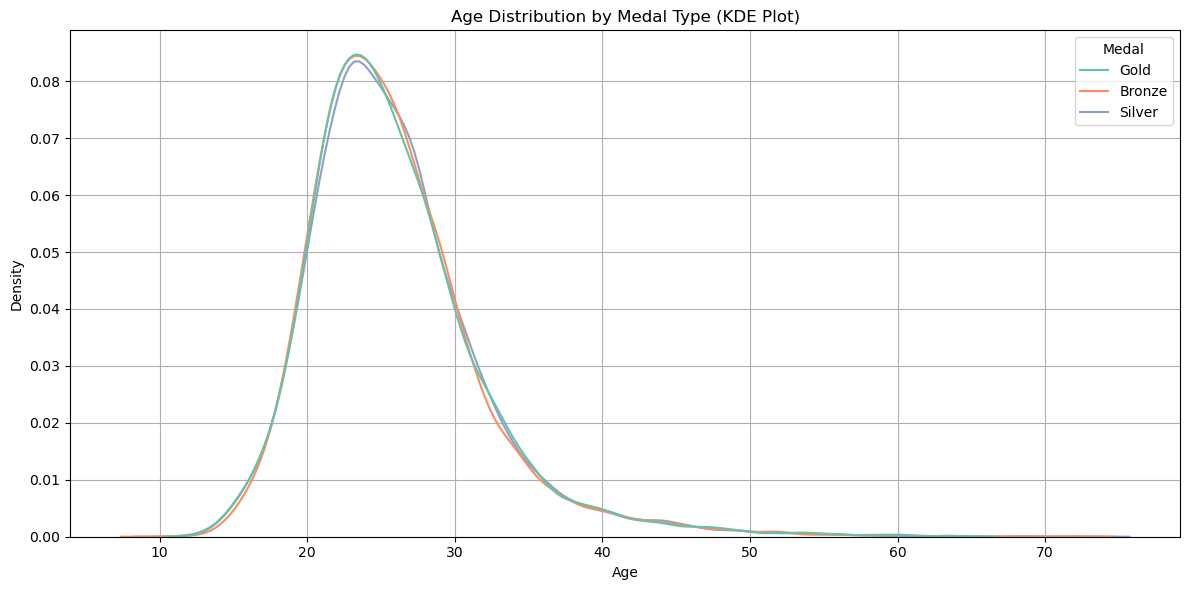

In [10]:
# Filter data for valid medal and age values
medal_age = df[df['Medal'].notnull()].dropna(subset=['Age'])

plt.figure(figsize=(12,6))
sns.kdeplot(data=medal_age, x='Age', hue='Medal', fill=False, common_norm=False, palette='Set2')
plt.title("Age Distribution by Medal Type (KDE Plot)")
plt.xlabel("Age")
plt.ylabel("Density")
plt.grid(True)
plt.tight_layout()
plt.show()


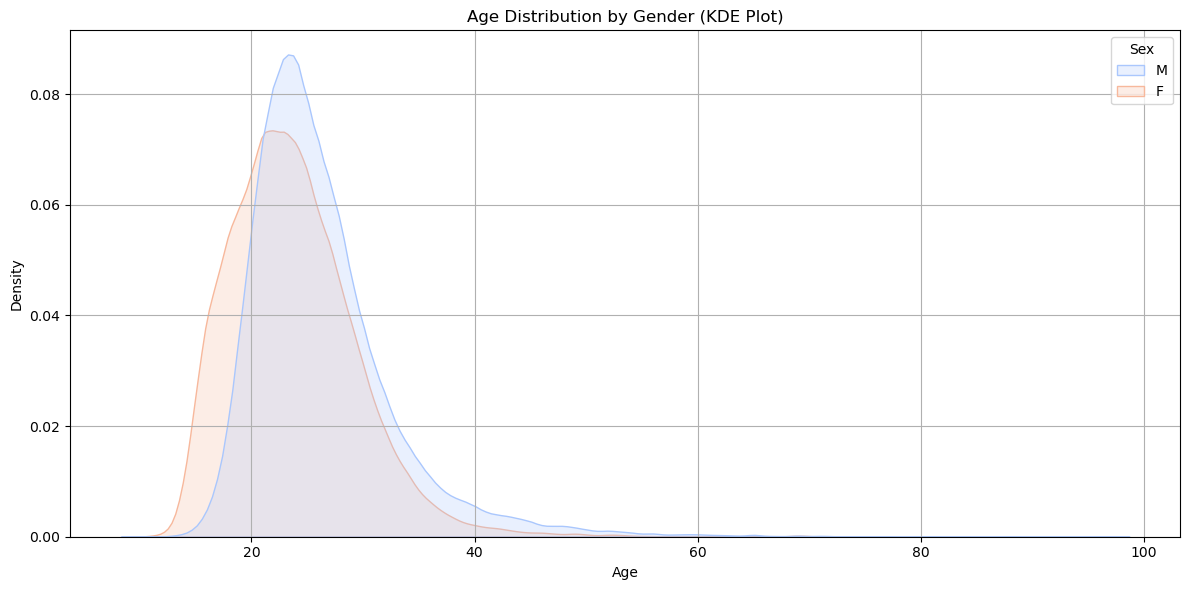

In [11]:
# Drop rows with missing age or gender
gender_age_df = df.dropna(subset=['Age', 'Sex'])

plt.figure(figsize=(12,6))
sns.kdeplot(data=gender_age_df, x='Age', hue='Sex', fill=True, common_norm=False, palette='coolwarm')
plt.title("Age Distribution by Gender (KDE Plot)")
plt.xlabel("Age")
plt.ylabel("Density")
plt.grid(True)
plt.tight_layout()
plt.show()


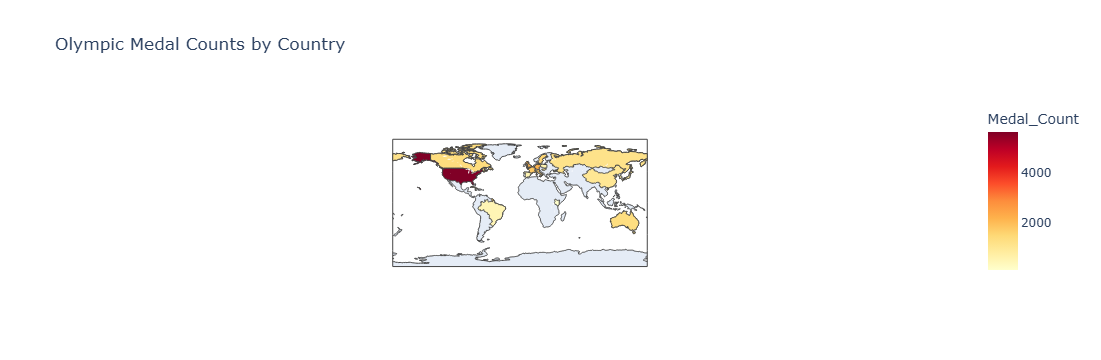

In [13]:
import plotly.express as px

# Step 1: Filter medal winners and count medals by NOC
medal_country = df[df['Medal'].notnull()].groupby('NOC').size().reset_index(name='Medal_Count')

# Step 2: Simple NOC to ISO 3-letter country mapping (expand as needed)
noc_iso_map = {
    'USA': 'USA', 'GBR': 'GBR', 'CHN': 'CHN', 'RUS': 'RUS', 'FRA': 'FRA',
    'GER': 'DEU', 'ITA': 'ITA', 'AUS': 'AUS', 'CAN': 'CAN', 'BRA': 'BRA',
    'JPN': 'JPN', 'KOR': 'KOR', 'NED': 'NLD', 'HUN': 'HUN', 'SWE': 'SWE',
    'KEN': 'KEN', 'JAM': 'JAM', 'CUB': 'CUB', 'ESP': 'ESP', 'POL': 'POL'
    # You can add more for complete global coverage
}

# Step 3: Map ISO codes
medal_country['iso_alpha'] = medal_country['NOC'].map(noc_iso_map)
medal_country = medal_country.dropna(subset=['iso_alpha'])  # Remove unmapped

# Step 4: Create choropleth map
fig = px.choropleth(
    medal_country,
    locations='iso_alpha',
    color='Medal_Count',
    hover_name='NOC',
    color_continuous_scale='YlOrRd',
    title='Olympic Medal Counts by Country'
)
fig.show()


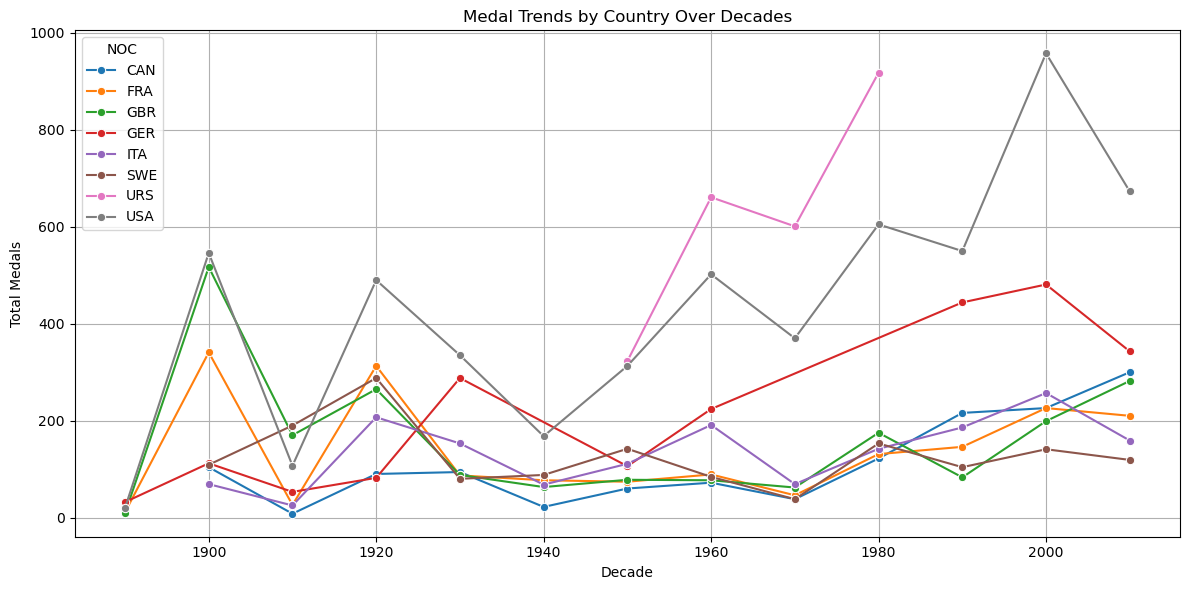

In [14]:
# Filter for medal-winning entries
df_medal = df[df['Medal'].notnull()]

# Create a 'Decade' column
df_medal['Decade'] = (df_medal['Year'] // 10) * 10

# Group by NOC and Decade
country_decade = df_medal.groupby(['NOC', 'Decade']).size().reset_index(name='Medals')

# Identify top 8 all-time medal-winning countries
top_nocs = country_decade.groupby('NOC')['Medals'].sum().nlargest(8).index

# Filter the dataframe to include only those countries
trend_df = country_decade[country_decade['NOC'].isin(top_nocs)]

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=trend_df, x='Decade', y='Medals', hue='NOC', marker="o")
plt.title("Medal Trends by Country Over Decades")
plt.ylabel("Total Medals")
plt.xlabel("Decade")
plt.grid(True)
plt.tight_layout()
plt.show()


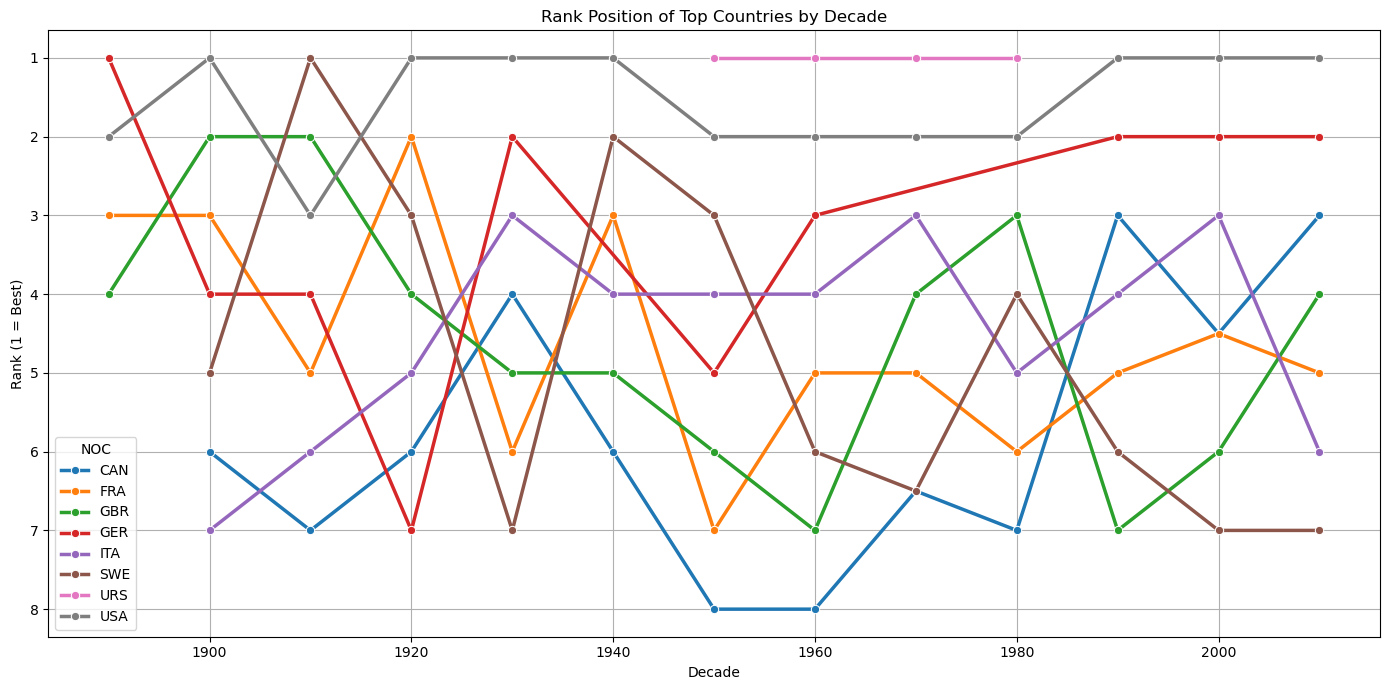

In [15]:
# Optional: transform to rank per decade
rank_df = trend_df.copy()
rank_df['Rank'] = rank_df.groupby('Decade')['Medals'].rank(ascending=False)

plt.figure(figsize=(14,7))
sns.lineplot(data=rank_df, x='Decade', y='Rank', hue='NOC', marker='o', linewidth=2.5)
plt.gca().invert_yaxis()  # Higher rank = lower value
plt.title("Rank Position of Top Countries by Decade")
plt.ylabel("Rank (1 = Best)")
plt.grid(True)
plt.tight_layout()
plt.show()


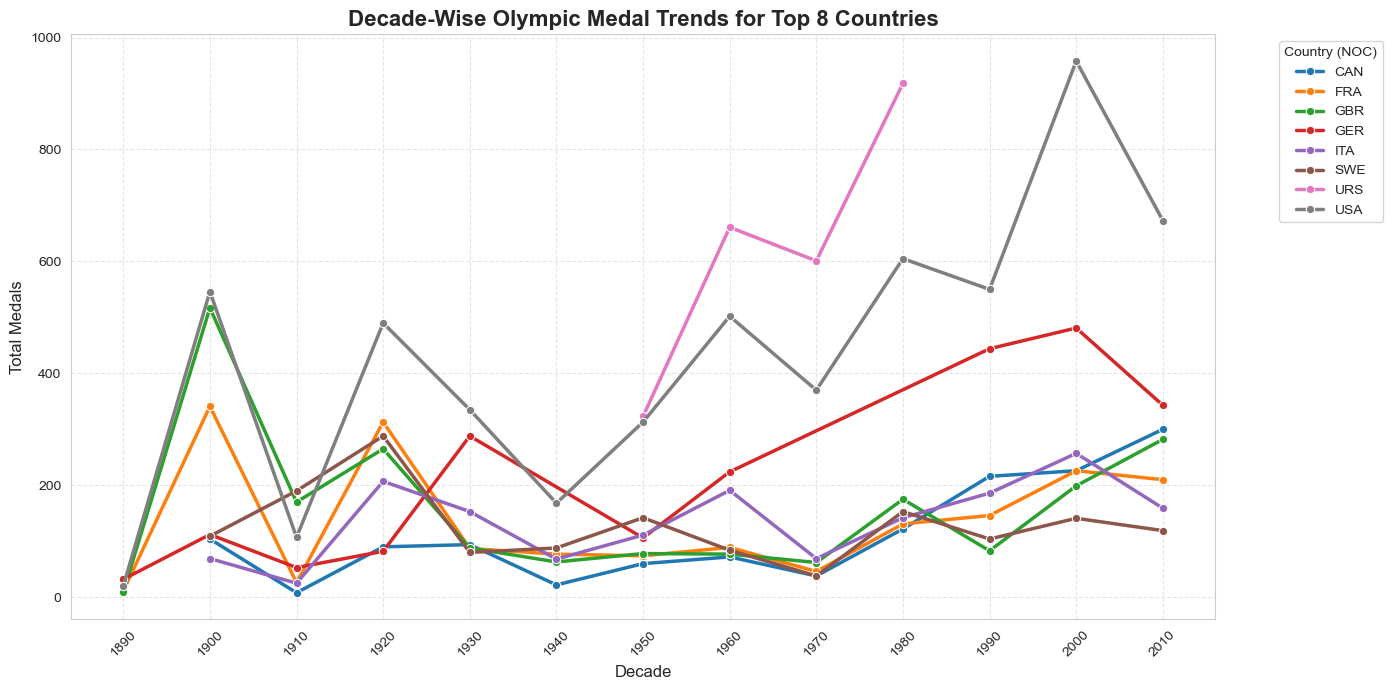

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Prepare medal data
df_medal = df[df['Medal'].notnull()].copy()
df_medal['Decade'] = (df_medal['Year'] // 10) * 10

# Step 2: Aggregate medals by NOC and Decade
country_decade = df_medal.groupby(['NOC', 'Decade']).size().reset_index(name='Medals')

# Step 3: Get top 8 countries by total medals
top_nocs = country_decade.groupby('NOC')['Medals'].sum().nlargest(8).index
trend_df = country_decade[country_decade['NOC'].isin(top_nocs)].sort_values(['NOC', 'Decade'])

# Step 4: Plot - Enhanced Line Chart
plt.figure(figsize=(14,7))
sns.set_style("whitegrid")
palette = sns.color_palette("tab10", len(top_nocs))

# Lineplot with better line separation
sns.lineplot(data=trend_df, x='Decade', y='Medals', hue='NOC', 
             marker='o', linewidth=2.5, palette=palette)

# Titles and labels
plt.title("Decade-Wise Olympic Medal Trends for Top 8 Countries", fontsize=16, fontweight='bold')
plt.xlabel("Decade", fontsize=12)
plt.ylabel("Total Medals", fontsize=12)
plt.xticks(trend_df['Decade'].unique(), rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Country (NOC)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [21]:
# Step 1: Clean and prepare data
career_df = df[['Name', 'Year']].drop_duplicates()

# Step 2: Group by athlete and calculate career length
career_span = career_df.groupby('Name')['Year'].agg(['min', 'max', 'nunique']).reset_index()
career_span['Career_Length'] = career_span['max'] - career_span['min']

# Step 3: Filter athletes with at least 3 Olympic participations (optional)
career_span = career_span[career_span['nunique'] >= 3]

# Step 4: Top 20 longest careers
top_careers = career_span.sort_values('Career_Length', ascending=False).head(20)


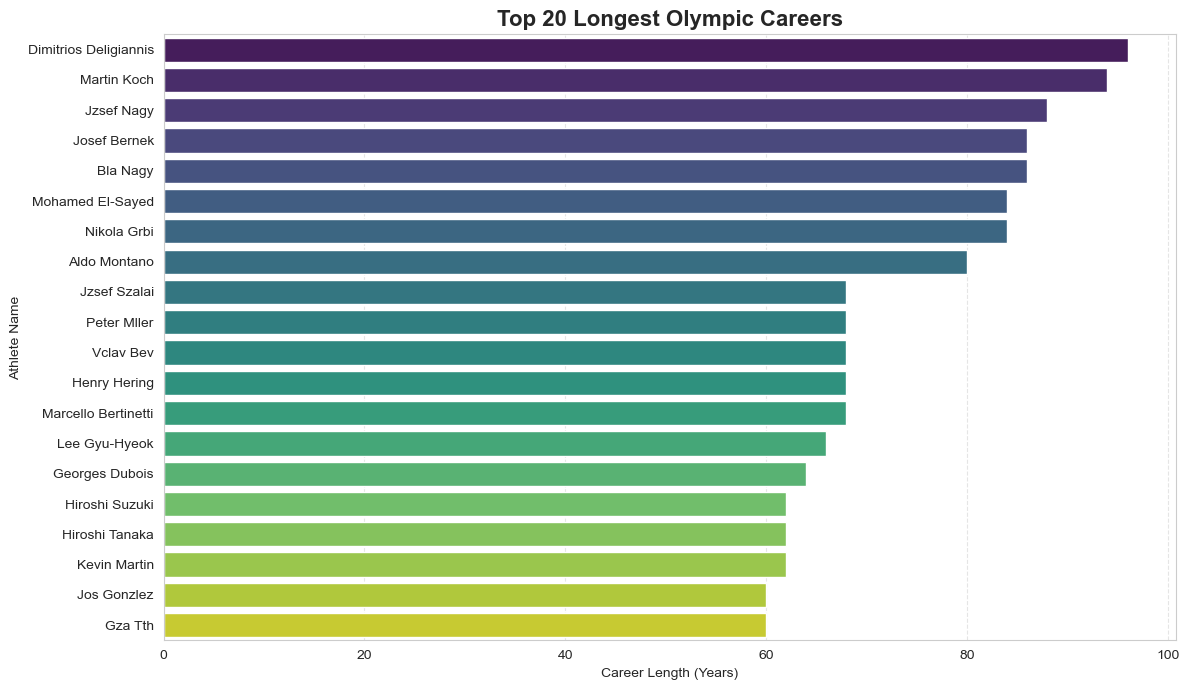

In [20]:
# Plot longest Olympic careers
plt.figure(figsize=(12, 7))
sns.barplot(data=top_careers, x='Career_Length', y='Name', palette='viridis')
plt.title("Top 20 Longest Olympic Careers", fontsize=16, fontweight='bold')
plt.xlabel("Career Length (Years)")
plt.ylabel("Athlete Name")
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [23]:
# Step 1: Drop duplicates to avoid counting the same event multiple times
career_gender_df = df[['Name', 'Year', 'Sex']].drop_duplicates()

# Step 2: Calculate career span for each athlete
career_span_gender = career_gender_df.groupby(['Name', 'Sex'])['Year'].agg(['min', 'max', 'nunique']).reset_index()
career_span_gender['Career_Length'] = career_span_gender['max'] - career_span_gender['min']
career_span_gender = career_span_gender.rename(columns={'nunique': 'Olympic_Appearances'})

# Step 3: Aggregate by gender
gender_summary = career_span_gender.groupby('Sex')[['Career_Length', 'Olympic_Appearances']].mean().reset_index()
gender_summary['Career_Length'] = gender_summary['Career_Length'].round(2)
gender_summary['Olympic_Appearances'] = gender_summary['Olympic_Appearances'].round(2)

print(gender_summary)



  Sex  Career_Length  Olympic_Appearances
0   F           1.95                 1.44
1   M           1.78                 1.37


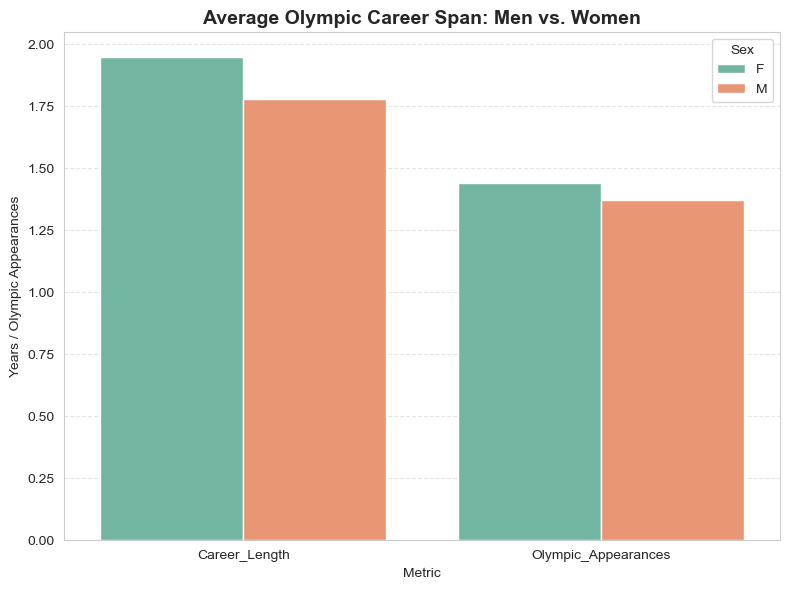

In [24]:
# Plotting career length vs. gender
plt.figure(figsize=(8, 6))
sns.barplot(data=gender_summary.melt(id_vars='Sex', var_name='Metric', value_name='Value'),
            x='Metric', y='Value', hue='Sex', palette='Set2')

plt.title("Average Olympic Career Span: Men vs. Women", fontsize=14, fontweight='bold')
plt.ylabel("Years / Olympic Appearances")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [25]:
# Step 1: Count number of participations by country (team)
participation_counts = df.groupby('Team')['Year'].nunique().reset_index(name='Participation_Years')

# Step 2: Count number of medals by country
medal_counts = df[df['Medal'].notnull()].groupby('Team').size().reset_index(name='Total_Medals')

# Step 3: Merge and fill 0 medals where missing
combined = participation_counts.merge(medal_counts, on='Team', how='left')
combined['Total_Medals'] = combined['Total_Medals'].fillna(0)

# Step 4: Filter countries with 5+ Olympic participations but 0 medals
non_medal_nations = combined[(combined['Participation_Years'] >= 5) & (combined['Total_Medals'] == 0)]
non_medal_nations = non_medal_nations.sort_values('Participation_Years', ascending=False)


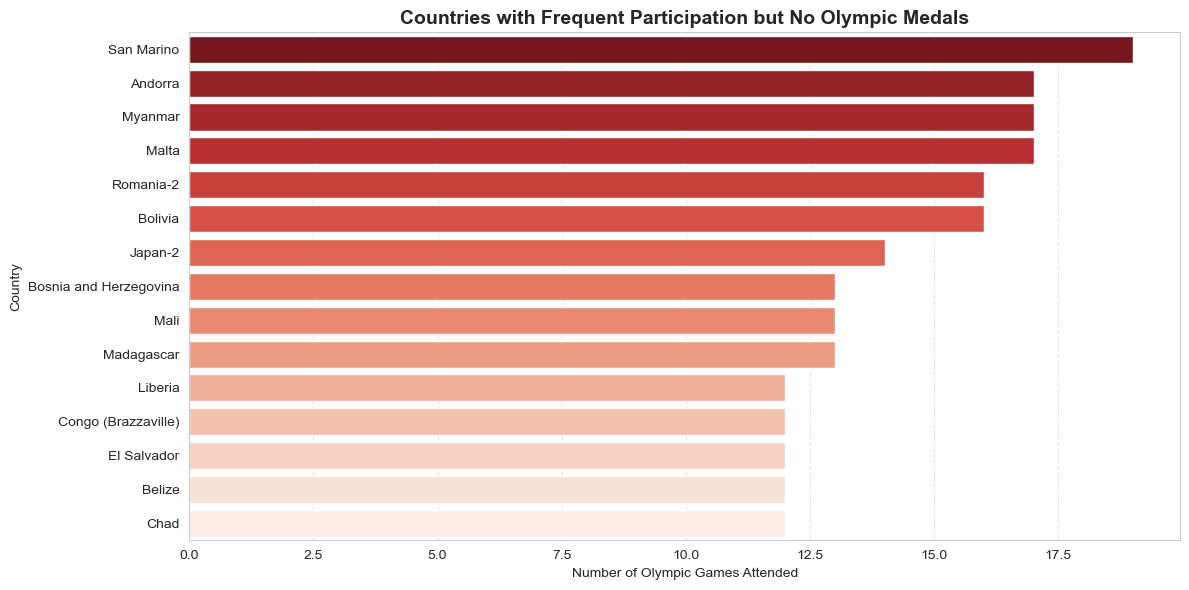

In [26]:
plt.figure(figsize=(12,6))
sns.barplot(data=non_medal_nations.head(15), x='Participation_Years', y='Team', palette='Reds_r')
plt.title("Countries with Frequent Participation but No Olympic Medals", fontsize=14, fontweight='bold')
plt.xlabel("Number of Olympic Games Attended")
plt.ylabel("Country")
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


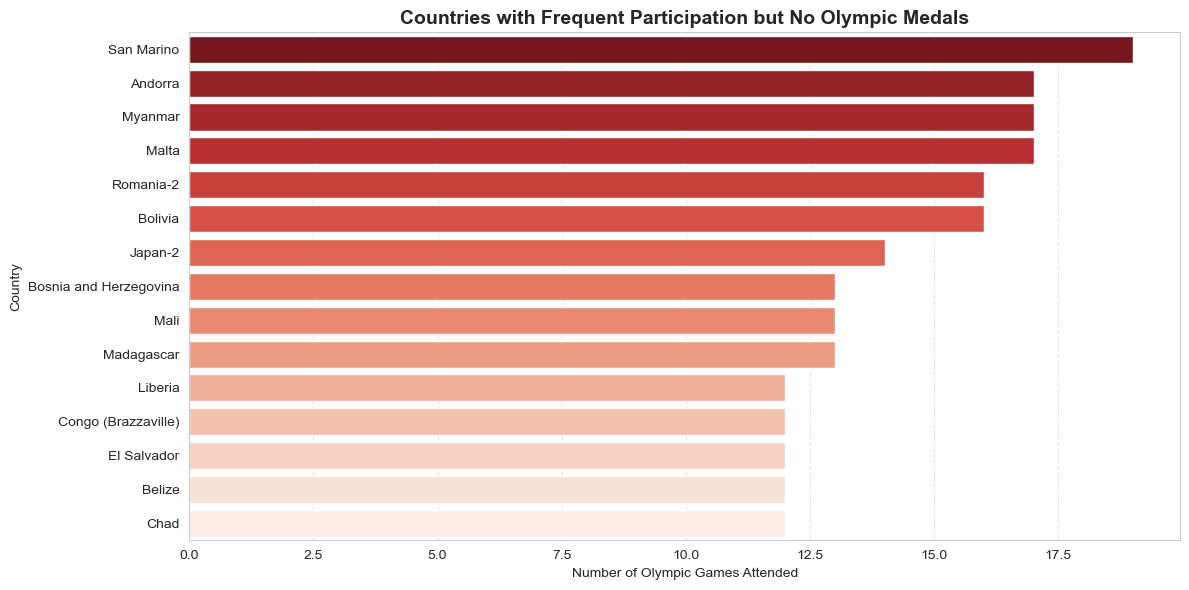

In [27]:
plt.figure(figsize=(12,6))
sns.barplot(data=non_medal_nations.head(15), x='Participation_Years', y='Team', palette='Reds_r')
plt.title("Countries with Frequent Participation but No Olympic Medals", fontsize=14, fontweight='bold')
plt.xlabel("Number of Olympic Games Attended")
plt.ylabel("Country")
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [28]:
# Sample mapping of countries to continents
region_map = {
    'India': 'Asia', 'Nepal': 'Asia', 'China': 'Asia', 'USA': 'North America',
    'Brazil': 'South America', 'Kenya': 'Africa', 'Nigeria': 'Africa',
    'France': 'Europe', 'Germany': 'Europe', 'Australia': 'Oceania',
    'Bolivia': 'South America', 'Ethiopia': 'Africa', 'Bhutan': 'Asia',
    # Add more as needed
}

# Apply mapping to dataframe
df['Region'] = df['Team'].map(region_map)

# Filter for valid regions
df_region = df[df['Region'].notnull()]

# Calculate participations and medals by region
region_participation = df_region.groupby('Region')['Year'].nunique().reset_index(name='Olympic_Participations')
region_medals = df_region[df_region['Medal'].notnull()].groupby('Region').size().reset_index(name='Total_Medals')

# Merge and calculate medal ratio
region_stats = region_participation.merge(region_medals, on='Region', how='left')
region_stats['Total_Medals'] = region_stats['Total_Medals'].fillna(0)
region_stats['Medals_per_10_Participations'] = (region_stats['Total_Medals'] / region_stats['Olympic_Participations']) * 10
region_stats = region_stats.sort_values('Medals_per_10_Participations', ascending=False)


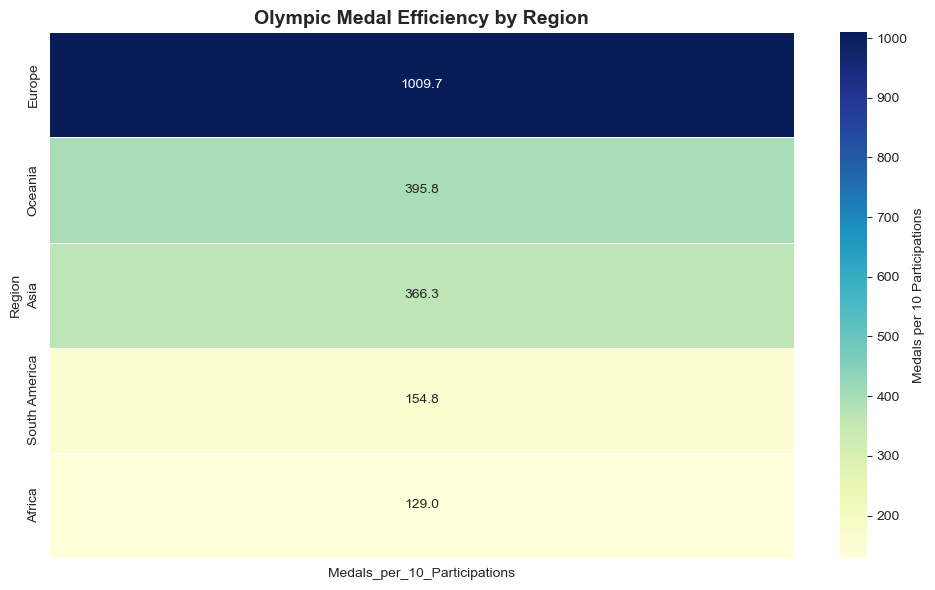

In [29]:
plt.figure(figsize=(10,6))
sns.heatmap(region_stats.set_index('Region')[['Medals_per_10_Participations']], 
            annot=True, cmap='YlGnBu', fmt='.1f', linewidths=0.5, cbar_kws={'label': 'Medals per 10 Participations'})

plt.title("Olympic Medal Efficiency by Region", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


In [30]:
# Count number of athletes per sport per Olympic year
sport_popularity = df.drop_duplicates(subset=['Name', 'Year', 'Sport'])  # avoid duplicates from multiple events
sport_trends = sport_popularity.groupby(['Year', 'Sport'])['Name'].count().reset_index(name='Athlete_Count')

# Optional: Filter top 5 sports for trend clarity
top_sports = df['Sport'].value_counts().head(5).index
filtered_trends = sport_trends[sport_trends['Sport'].isin(top_sports)]


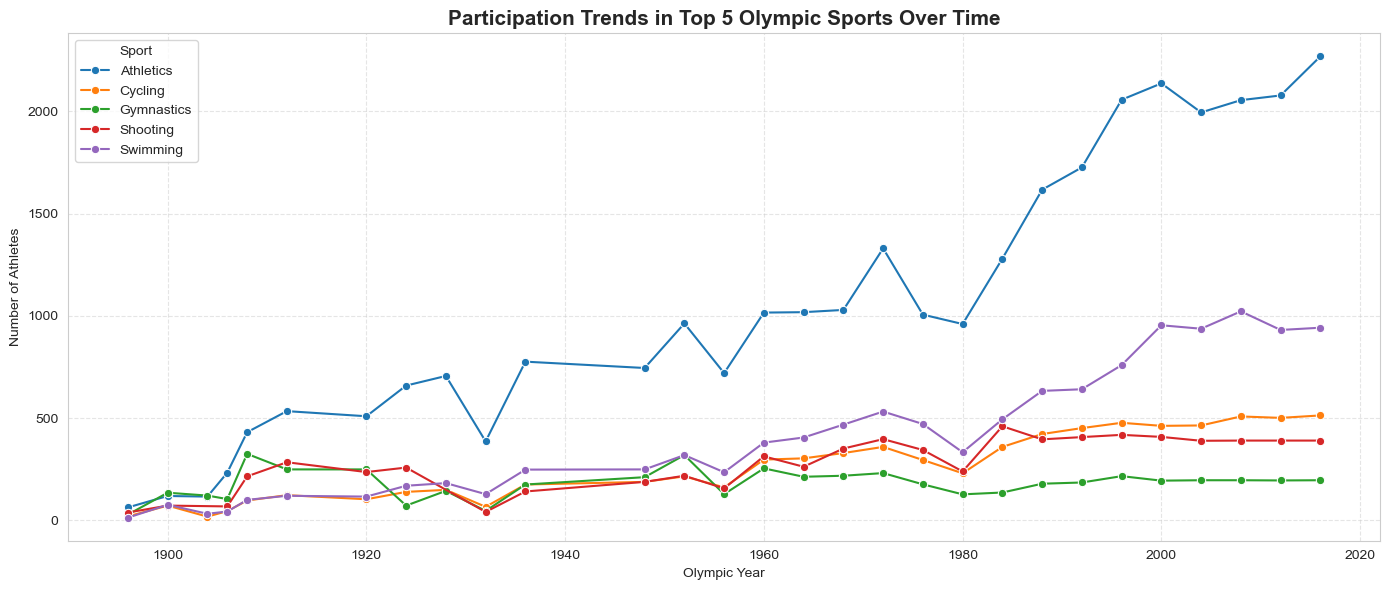

In [31]:
plt.figure(figsize=(14,6))
sns.lineplot(data=filtered_trends, x='Year', y='Athlete_Count', hue='Sport', marker='o')
plt.title("Participation Trends in Top 5 Olympic Sports Over Time", fontsize=15, fontweight='bold')
plt.xlabel("Olympic Year")
plt.ylabel("Number of Athletes")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [32]:
# Step 1: Filter valid entries
gender_sport = df.dropna(subset=['Sex', 'Sport'])

# Step 2: Count by Sport and Sex
gender_counts = gender_sport.groupby(['Sport', 'Sex']).size().unstack(fill_value=0)

# Step 3: Calculate female participation ratio
gender_counts['Total'] = gender_counts['F'] + gender_counts['M']
gender_counts['Female_Ratio'] = gender_counts['F'] / gender_counts['Total']
gender_counts = gender_counts.sort_values('Female_Ratio')

# Step 4: Prepare for plot
gender_counts['Bias'] = gender_counts['Female_Ratio'] - 0.5  # Center at 0 = balanced
gender_counts = gender_counts.reset_index()


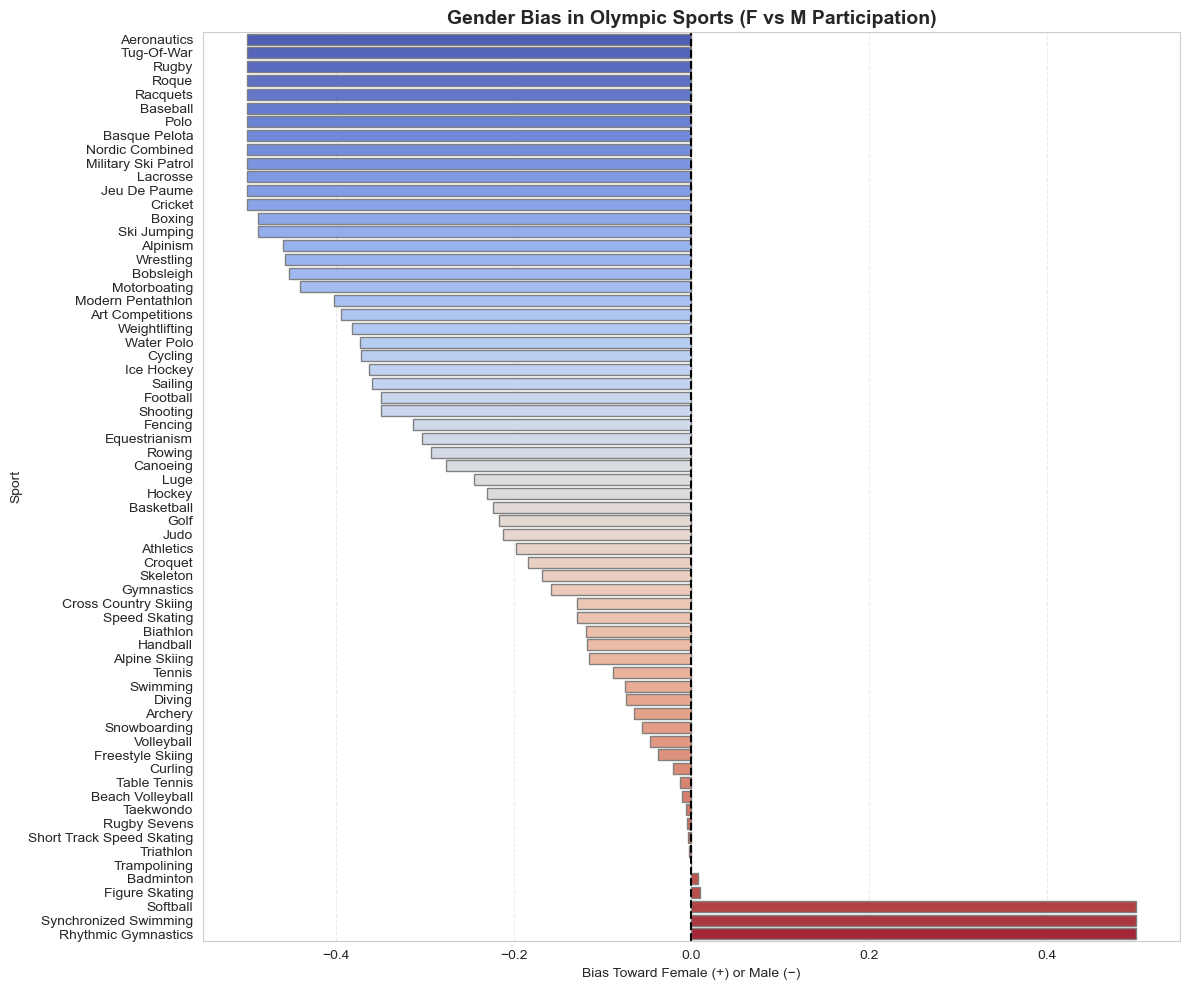

In [33]:
plt.figure(figsize=(12, 10))
sns.barplot(data=gender_counts, y='Sport', x='Bias', palette='coolwarm', edgecolor='gray')
plt.axvline(0, color='black', linestyle='--')
plt.title("Gender Bias in Olympic Sports (F vs M Participation)", fontsize=14, fontweight='bold')
plt.xlabel("Bias Toward Female (+) or Male (−)")
plt.ylabel("Sport")
plt.grid(True, axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [34]:
# Step 1: Count unique athletes per country
athlete_counts = df.drop_duplicates(subset=['Name', 'Year']) \
                   .groupby('Team').size().reset_index(name='Unique_Athletes')

# Step 2: Count total medals per country
medal_counts = df[df['Medal'].notnull()].groupby('Team').size().reset_index(name='Total_Medals')

# Step 3: Merge and calculate efficiency
efficiency_df = athlete_counts.merge(medal_counts, on='Team', how='left')
efficiency_df['Total_Medals'] = efficiency_df['Total_Medals'].fillna(0)
efficiency_df['Medals_per_100_Athletes'] = (efficiency_df['Total_Medals'] / efficiency_df['Unique_Athletes']) * 100

# Step 4: Filter countries with 500+ athletes to avoid skew
efficient_nations = efficiency_df[efficiency_df['Unique_Athletes'] >= 500] \
                    .sort_values('Medals_per_100_Athletes', ascending=False).head(15)


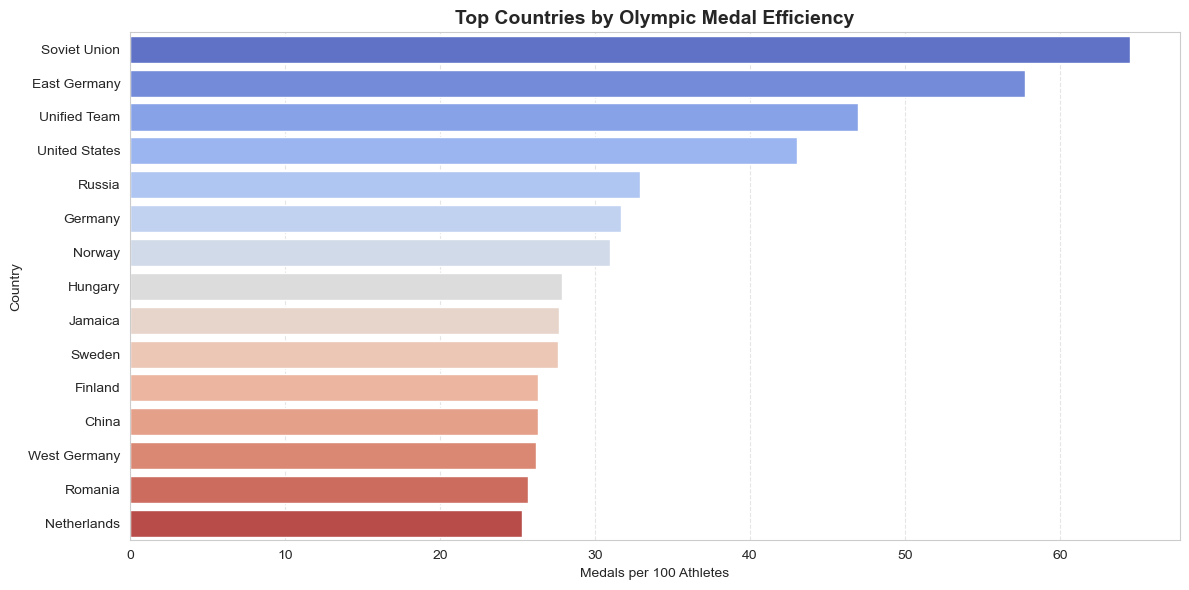

In [35]:
plt.figure(figsize=(12,6))
sns.barplot(data=efficient_nations, x='Medals_per_100_Athletes', y='Team', palette='coolwarm')
plt.title("Top Countries by Olympic Medal Efficiency", fontsize=14, fontweight='bold')
plt.xlabel("Medals per 100 Athletes")
plt.ylabel("Country")
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
